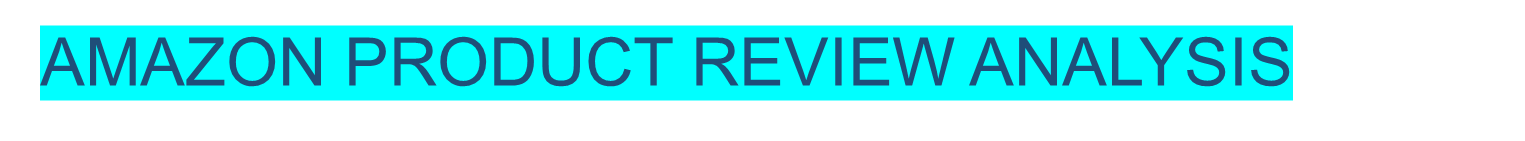

## STEPS INVOLVED:
- PREPROCESSING AND CLEANING  
- EXPLORATORY DATA  ANALYSIS  ( TABLEAU )  
- SENTIMENT ANALYSIS  
- TEXT CLASSIFICATION  
- CLUSTERING 
- TIME SERIES ANALYSIS 

## MOUNTING DRIVE

In [1]:
'''# Mounting google drive
from google.colab import drive
drive.mount('/content/gdrive')'''

"# Mounting google drive\nfrom google.colab import drive\ndrive.mount('/content/gdrive')"

## IMPORTING LIBRARIES

In [1]:
import json                                        # to work with json file
import pandas as pd                                # to work with dataframes
import numpy as np                                 # to work with numpy arrays
import gzip                                        # to extract work file from zip file
import nltk                                        # working with nlp algorithms
from nltk.sentiment import SentimentIntensityAnalyzer  # To predict the sentiments based on the text
from tqdm.notebook import tqdm                     # library for adding progress bar
import sklearn                                     # to working with machine learning algorithms
from sklearn.linear_model import LogisticRegression  # Classification algorithm
from sklearn.feature_extraction.text import TfidfVectorizer # To convert text to numerical based on tfidf score
from nltk.corpus import stopwords                  # to detect stopwords
import re                                          # To remove the unwanted text
from sklearn.metrics import classification_report  # Classification report
from sklearn.metrics import accuracy_score         # evaluation metric
from sklearn.metrics import f1_score               # evaluation metric
from sklearn.metrics import recall_score           # evaluation metric
from sklearn.metrics import precision_score        # evaluation metric
from sklearn.model_selection import train_test_split # train test split
from sklearn.preprocessing import LabelEncoder     # To convert categorical to numerical
import warnings
warnings.filterwarnings('ignore')                  # To ignore the warnings
from sklearn.naive_bayes import MultinomialNB       # Naive bayes algorithm
import matplotlib.pyplot as plt                     # Visualization tool
import seaborn as sns                               # Visualization tool
from statsmodels.tsa.seasonal import seasonal_decompose            # Time series components
from statsmodels.tsa.stattools import adfuller                      # To find the stationarity of the data
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf       # To plot ACF and PACF plots
from statsmodels.tsa.arima.model import ARIMA                       # To build the ARIMA model                                  
from statsmodels.tsa.statespace.sarimax import SARIMAX              # To build the sarimax model
from sklearn.preprocessing import MinMaxScaler, StandardScaler      # For Scaling the data
from sklearn.cluster import KMeans                                  # For Cluster Formation  
from sklearn.feature_extraction.text import CountVectorizer         # For Vectorisation
from wordcloud import WordCloud, STOPWORDS                          # For Word Cloud
from sklearn import metrics                                         # For Matrics Algorithms
from sklearn.metrics import confusion_matrix                        # It shows the tabel of probability values
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

## CONVERTING THE FILE FROM JSON TO DATAFRAME

In [4]:
file_path = r"C:\Users\patel\Downloads\Compressed\meta_Clothing_Shoes_and_Jewelry.json.gz"
num_rows = 400000

with gzip.open(file_path, 'rb') as f:
    rows = [json.loads(f.readline().decode()) for i in range(num_rows)]

df = pd.DataFrame(rows)

In [5]:
df.head(2)

category  \
0  [Clothing, Shoes & Jewelry, Costumes & Accesso...   
1  [Clothing, Shoes & Jewelry, Luggage & Travel G...   

                                         description  \
0  [6" long, stretched waist measures 11 1/2" acr...   
1  [The Hottest Bag in Town! Brand: Anello Condit...   

                                               title       brand  \
0  Purple Sequin Tiny Dancer Tutu Ballet Dance Fa...  Big Dreams   
1  Japan Anello Backpack Unisex LARGE LIGHT GRAY ...      Anello   

                                             feature  \
0  [3 layers of tulle, 6" long, stretched waist m...   
1  [Polyester Canvas Waterproof, Imported, Size: ...   

                                 rank               date        asin  \
0  19,963,069inClothing,ShoesJewelry(  5 star5 star (0%)  0000037214   
1   4,537,420inClothing,ShoesJewelry(             5 star  0201377179   

                                            imageURL  \
0                                                NaN   
1  [https://images-na.ssl-images-amazon.com/image...   

                                     imageURLHighRes also_view price  fit  \
0                                                NaN       NaN   NaN  NaN   
1  [https://images-na.ssl-images-amazon.com/image...       NaN   NaN  NaN   

  also_buy main_cat tech1 details similar_item tech2  
0      NaN      NaN   NaN     NaN          NaN   NaN  
1      NaN      NaN   NaN     NaN          NaN   NaN

In [2]:
file_path = r"C:\Users\patel\Downloads\Compressed\Clothing_Shoes_and_Jewelry.json.gz"
num_rows = 400000

with gzip.open(file_path, 'rb') as f1:
    rows = [json.loads(f1.readline().decode()) for i in range(num_rows)]

df1 = pd.DataFrame(rows)

In [3]:
df1.head(2)

overall vote  verified   reviewTime      reviewerID        asin  \
0      5.0    2      True   05 4, 2014  A2IC3NZN488KWK  0871167042   
1      4.0  NaN      True  04 26, 2014  A3OT9BYASFGU2X  0871167042   

                       style reviewerName  \
0  {'Format:': ' Paperback'}   Ruby Tulip   
1  {'Format:': ' Paperback'}    Laurie K.   

                                          reviewText  \
0  This book has beautiful photos, good and under...   
1  I love the ideas but have no access sea glass,...   

                                summary  unixReviewTime image  
0                        Unique designs      1399161600   NaN  
1  makes you want to live by the sea...      1398470400   NaN

### Checking shape

In [6]:
print('Rows in meta dataset :','\t',df.shape[0],'\n')
print('Columns in meta dataset :','\t',df.shape[1])

Rows in meta dataset : 	 400000 

Columns in meta dataset : 	 19


In [7]:
print('Rows in reviews dataset :','\t',df1.shape[0],'\n')
print('Columns in reviews dataset :','\t',df1.shape[1])

Rows in reviews dataset : 	 400000 

Columns in reviews dataset : 	 12


### Feature selection for data1

In [8]:
data1 = df1[['asin', 'reviewText','reviewerName', 'overall', 'unixReviewTime', 'reviewTime', 'verified', 'summary']]

### Feature selection for data2

In [9]:
data2 = df[['asin', 'title', 'price', 'brand']]
data2.head()

asin                                              title   price  \
0  0000037214  Purple Sequin Tiny Dancer Tutu Ballet Dance Fa...     NaN   
1  0201377179  Japan Anello Backpack Unisex LARGE LIGHT GRAY ...     NaN   
2  0204444454  Japan Anello Backpack Unisex PINK BEIGE LARGE ...  $70.00   
3  0204444403  Japan Anello Backpack Unisex BLACK LARGE PU LE...  $65.99   
4  0206313535  bettyhome Unisex Adult Winter Spring Thicken C...  $18.99   

        brand  
0  Big Dreams  
1      Anello  
2      Anello  
3      Anello  
4   bettyhome

### Merging the data set

In [10]:
H_data = pd.merge(data1, data2, on = 'asin')
H_data.head(2)

asin                                         reviewText reviewerName  \
0  0871167042  This book has beautiful photos, good and under...   Ruby Tulip   
1  0871167042  I love the ideas but have no access sea glass,...    Laurie K.   

   overall  unixReviewTime   reviewTime  verified  \
0      5.0      1399161600   05 4, 2014      True   
1      4.0      1398470400  04 26, 2014      True   

                                summary  \
0                        Unique designs   
1  makes you want to live by the sea...   

                                               title   price  \
0  Organic Wire and Metal Jewelry: Stunning Piece...  $17.95   
1  Organic Wire and Metal Jewelry: Stunning Piece...  $17.95   

                                brand  
0  Visit Amazon's Eva M. Sherman Page  
1  Visit Amazon's Eva M. Sherman Page

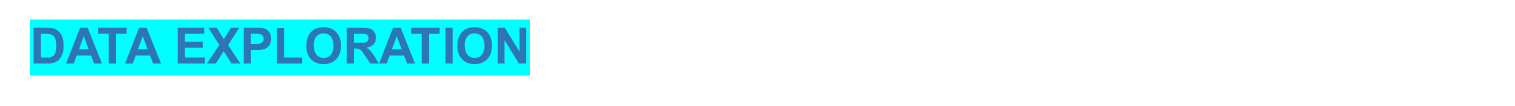

### Checking Shape of dataset

In [11]:
print('Rows in h_data dataset :','\t',H_data.shape[0],'\n')
print('Columns in h_data dataset :','\t',H_data.shape[1])

Rows in h_data dataset : 	 642198 

Columns in h_data dataset : 	 11


### Checking description

In [12]:
H_data.describe()

overall  unixReviewTime
count  642198.000000    6.421980e+05
mean        4.267083    1.434340e+09
std         1.169879    6.165757e+07
min         1.000000    9.392544e+08
25%         4.000000    1.406074e+09
50%         5.000000    1.441066e+09
75%         5.000000    1.479082e+09
max         5.000000    1.526429e+09

### Checking information of dataset

In [13]:
H_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 642198 entries, 0 to 642197
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   asin            642198 non-null  object 
 1   reviewText      641608 non-null  object 
 2   reviewerName    642159 non-null  object 
 3   overall         642198 non-null  float64
 4   unixReviewTime  642198 non-null  int64  
 5   reviewTime      642198 non-null  object 
 6   verified        642198 non-null  bool   
 7   summary         642005 non-null  object 
 8   title           642198 non-null  object 
 9   price           592421 non-null  object 
 10  brand           214989 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(8)
memory usage: 54.5+ MB


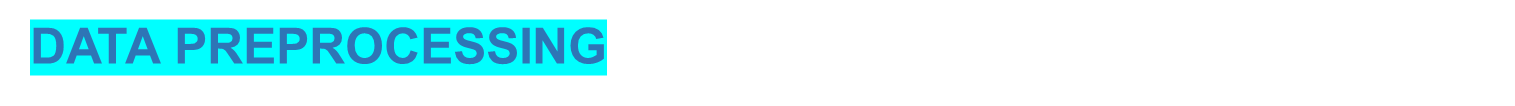

### Removing the duplicates

In [14]:
H_data.drop_duplicates(["reviewText","asin","reviewerName"], keep = "last", inplace = True)

### Replace blank spaces with Nan 

In [15]:
H_data.replace('', np.nan, inplace=True)

### Checking null values

In [16]:
H_data.isnull().sum()

asin                   0
reviewText           340
reviewerName          23
overall                0
unixReviewTime         0
reviewTime             0
verified               0
summary              114
title                  0
price              32239
brand             260303
dtype: int64

### Create def function for remove $ sign and impute Nan with median value in price column.

In [17]:
def convert_price(val):
    try:
        return float(val.replace('$', ''))
    except:
        return np.nan

H_data['price'] = H_data['price'].apply(convert_price)

median_price = H_data['price'].median()

H_data['price'] = H_data['price'].fillna(median_price)

### Replace Nan with unknown in brand column

In [18]:
H_data['brand'] = H_data['brand'].fillna('unknown')

### Checking null values

In [19]:
H_data.isnull().sum()

asin                0
reviewText        340
reviewerName       23
overall             0
unixReviewTime      0
reviewTime          0
verified            0
summary           114
title               0
price               0
brand               0
dtype: int64

### Drop remaining Nan from other columns and again check null values

In [20]:
H_data.dropna(inplace = True)

In [21]:
H_data.isnull().sum()

asin              0
reviewText        0
reviewerName      0
overall           0
unixReviewTime    0
reviewTime        0
verified          0
summary           0
title             0
price             0
brand             0
dtype: int64

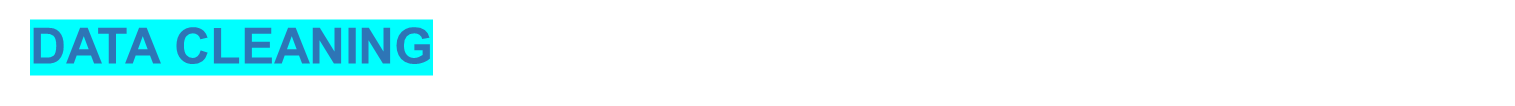

### Creating cleaning function

In [22]:
def cleaning(text):
    # Replace any non-alphanumeric characters (except for hyphens) with a space character
    text = re.sub("[^0-9A-Za-z\-]+", " ", text) 
    
    # Replace any digits that are not immediately preceded by a word character with an empty string
    text = re.sub("(?<!\w)\d+", "", text)
    
    # Replace any hyphens that are not immediately followed by a word character with an empty string
    text = re.sub("-(?!\w)", "", text)
    
    # Split the text into words using whitespace as a delimiter, remove any leading/trailing whitespace, and join the words back together with a single space character between each word
    text = " ".join(text.split())
    
    # Convert all characters in the text to lowercase
    text = text.lower()
    
    # Return the cleaned text string
    return text

In [23]:
H_data["reviewText"] = H_data["reviewText"].apply(cleaning)

### Removing stop words

In [24]:
nltk.download('stopwords')
stop_word = stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\patel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
H_data['reviewText'] = H_data['reviewText'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_word)]))

### Checking Information

In [26]:
H_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398780 entries, 0 to 642197
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   asin            398780 non-null  object 
 1   reviewText      398780 non-null  object 
 2   reviewerName    398780 non-null  object 
 3   overall         398780 non-null  float64
 4   unixReviewTime  398780 non-null  int64  
 5   reviewTime      398780 non-null  object 
 6   verified        398780 non-null  bool   
 7   summary         398780 non-null  object 
 8   title           398780 non-null  object 
 9   price           398780 non-null  float64
 10  brand           398780 non-null  object 
dtypes: bool(1), float64(2), int64(1), object(7)
memory usage: 33.8+ MB


### converting the data type of reviewTime with date type

In [27]:
H_data['reviewTime'] = pd.to_datetime(H_data['reviewTime'])

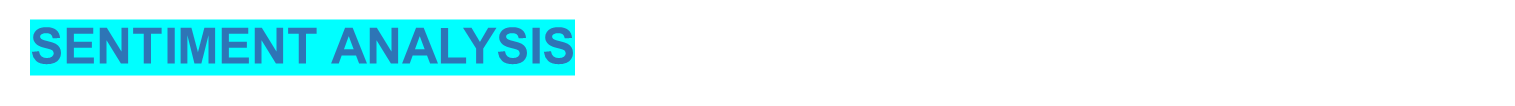
Creating a new column " Sentiment" , assigning Sentiments i.e "Positive","Neutral"and "Negative" to each review based on ratings given in "overall" column.

### Positive Negative and Neutral Sentiment

In [28]:
a=[]
for x in H_data['overall']: 
  if x>3:
    x='Positive'
    a.append(x)
  elif x==3:
    x='Neutral'
    a.append(x)
  else:
    x='Negative'
    a.append(x)

In [29]:
H_data['Sentiment']=a

### Plot bar chart for Positive, Negative and Neutral Sentiment

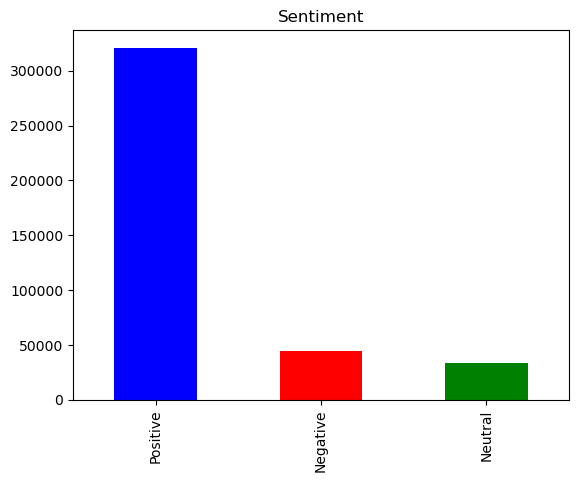

In [30]:
colors = ['blue', 'red', 'green']

H_data.Sentiment.value_counts().plot.bar(color=colors)

plt.title('Sentiment');

### VADER
- VADER ( Valence Aware Dictionary for Sentiment Reasoning) is a model used for text sentiment analysis that is sensitive to both polarity (positive/negative) and intensity (strength) of emotion. It is available in the NLTK package and can be applied directly to unlabeled text data.

In [31]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\patel\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

###  Getting the polarity of reviewText 

In [32]:
res2 = {}
t = 0
for i, row in tqdm(H_data.iterrows(), total=len(H_data)):
    text = row['reviewText']
    res2[t] = SentimentIntensityAnalyzer().polarity_scores(text)
    t = t + 1

  0%|          | 0/398780 [00:00<?, ?it/s]

In [33]:
j = pd.DataFrame(res2).T
j

neg    neu    pos  compound
0       0.000  0.610  0.390    0.8622
1       0.000  0.390  0.610    0.9260
2       0.000  0.764  0.236    0.9450
3       0.000  0.515  0.485    0.9062
4       0.000  0.424  0.576    0.9723
...       ...    ...    ...       ...
398775  0.000  0.000  1.000    0.4404
398776  0.000  1.000  0.000    0.0000
398777  0.000  1.000  0.000    0.0000
398778  0.592  0.408  0.000   -0.7003
398779  0.055  0.452  0.494    0.9696

[398780 rows x 4 columns]

###  concating the main data and the Polarity Scores

In [34]:
M_data = pd.concat([H_data, j], axis = 1)

In [35]:
M_data.dropna(inplace = True)

In [36]:
M_data.insert(0, 'Class', np.nan)
M_data.loc[M_data['compound']>=0.05, 'Class'] = 'positive'
M_data.loc[M_data['compound']<=-0.05, 'Class'] = 'negative'
M_data.loc[((M_data['compound'] > -0.05) & (M_data['compound'] < 0.05)), 'Class'] = 'neutral'

In [37]:
M_data.head(2)

Class        asin                                         reviewText  \
0  positive  0871167042  book beautiful photos good understandable dire...   
1  positive  0871167042  love ideas access sea glass experiment stones ...   

  reviewerName  overall  unixReviewTime reviewTime verified  \
0   Ruby Tulip      5.0    1.399162e+09 2014-05-04     True   
1    Laurie K.      4.0    1.398470e+09 2014-04-26     True   

                                summary  \
0                        Unique designs   
1  makes you want to live by the sea...   

                                               title  price  \
0  Organic Wire and Metal Jewelry: Stunning Piece...  17.95   
1  Organic Wire and Metal Jewelry: Stunning Piece...  17.95   

                                brand Sentiment  neg   neu   pos  compound  
0  Visit Amazon's Eva M. Sherman Page  Positive  0.0  0.61  0.39    0.8622  
1  Visit Amazon's Eva M. Sherman Page  Positive  0.0  0.39  0.61    0.9260

### giving the datetiem index for reviewtime on the basis of year and month


In [38]:
M_data['year'] = pd.DatetimeIndex(M_data['reviewTime']).year
M_data['month'] = pd.DatetimeIndex(M_data['reviewTime']).month

### converting thedata into CSV file

In [39]:
#M_data.to_csv("C.csv",index=False)

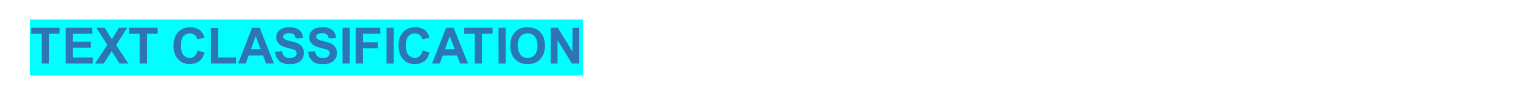

### Read the data

In [40]:
df = pd.read_csv("C.csv")
df.head(2)

Class        asin                                         reviewText  \
0  positive  0871167042  book beautiful photos good understandable dire...   
1  positive  0871167042  love ideas access sea glass experiment stones ...   

  reviewerName  overall  unixReviewTime  reviewTime  verified  \
0   Ruby Tulip      5.0    1.399162e+09  2014-05-04      True   
1    Laurie K.      4.0    1.398470e+09  2014-04-26      True   

                                summary  \
0                        Unique designs   
1  makes you want to live by the sea...   

                                               title  price  \
0  Organic Wire and Metal Jewelry: Stunning Piece...  17.95   
1  Organic Wire and Metal Jewelry: Stunning Piece...  17.95   

                                brand Sentiment  neg   neu   pos  compound  \
0  Visit Amazon's Eva M. Sherman Page  Positive  0.0  0.61  0.39    0.8622   
1  Visit Amazon's Eva M. Sherman Page  Positive  0.0  0.39  0.61    0.9260   

   year  month  
0  2014      5  
1  2014      4

In [41]:
H_data.shape

(398780, 12)

### Converting the datatype of reviewTime to Date type

In [42]:
df["reviewTime"] = pd.to_datetime(df["reviewTime"])

### checking null values

In [43]:
df.isnull().sum()              

Class               0
asin                0
reviewText        251
reviewerName        7
overall             0
unixReviewTime      0
reviewTime          0
verified            0
summary             1
title               0
price               0
brand               0
Sentiment           0
neg                 0
neu                 0
pos                 0
compound            0
year                0
month               0
dtype: int64

### Drop null values and again check null values 

In [44]:
df.dropna(inplace=True)

In [45]:
df.isnull().sum()              

Class             0
asin              0
reviewText        0
reviewerName      0
overall           0
unixReviewTime    0
reviewTime        0
verified          0
summary           0
title             0
price             0
brand             0
Sentiment         0
neg               0
neu               0
pos               0
compound          0
year              0
month             0
dtype: int64

### For WordCloud

In [46]:
stopwords = set(STOPWORDS)

def word_cloud(data, title):
    wordcloud = WordCloud(
    background_color = "white",
    max_font_size = 40,
    max_words = 200,
    stopwords = stopwords,
    scale = 3).generate(str(data))
    fig = plt.figure(figsize = (15, 15))
    plt.axis("off")
    if title: 
        fig.suptitle(title, fontsize=15)
        fig.subplots_adjust(top=2.25)
    plt.imshow(wordcloud)
    plt.show()

In [47]:
neg=df[df["Sentiment"] == "Negative"]["reviewText"]
pos=df[df["Sentiment"] == "Positive"]["reviewText"]
neu=df[df["Sentiment"] == "Neutral"]["reviewText"]

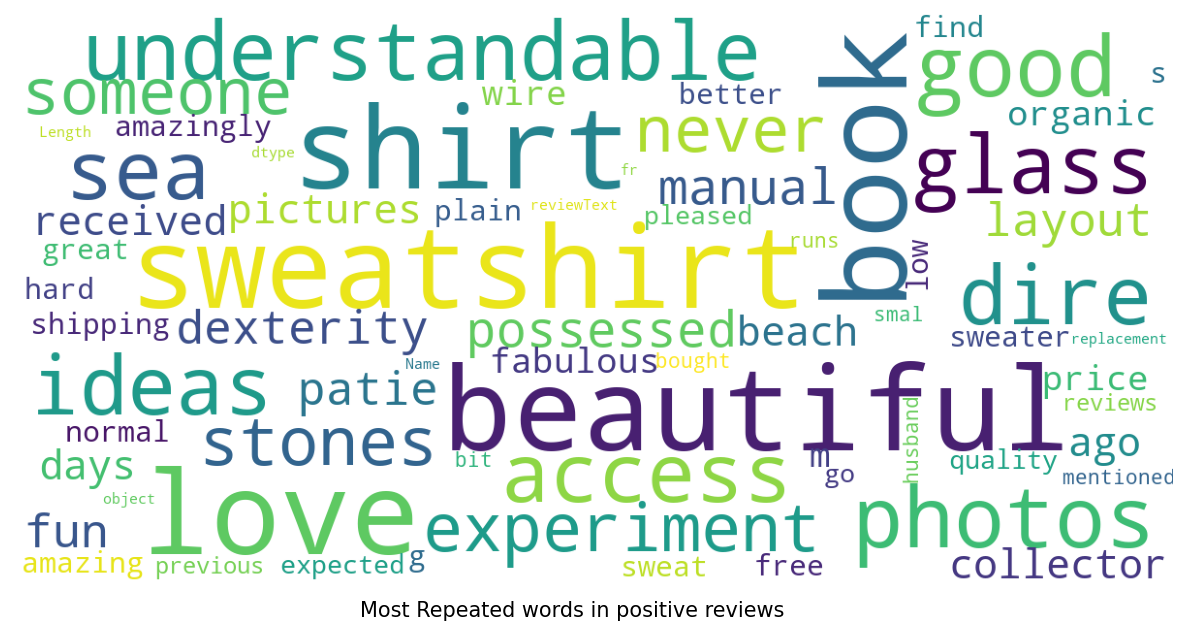

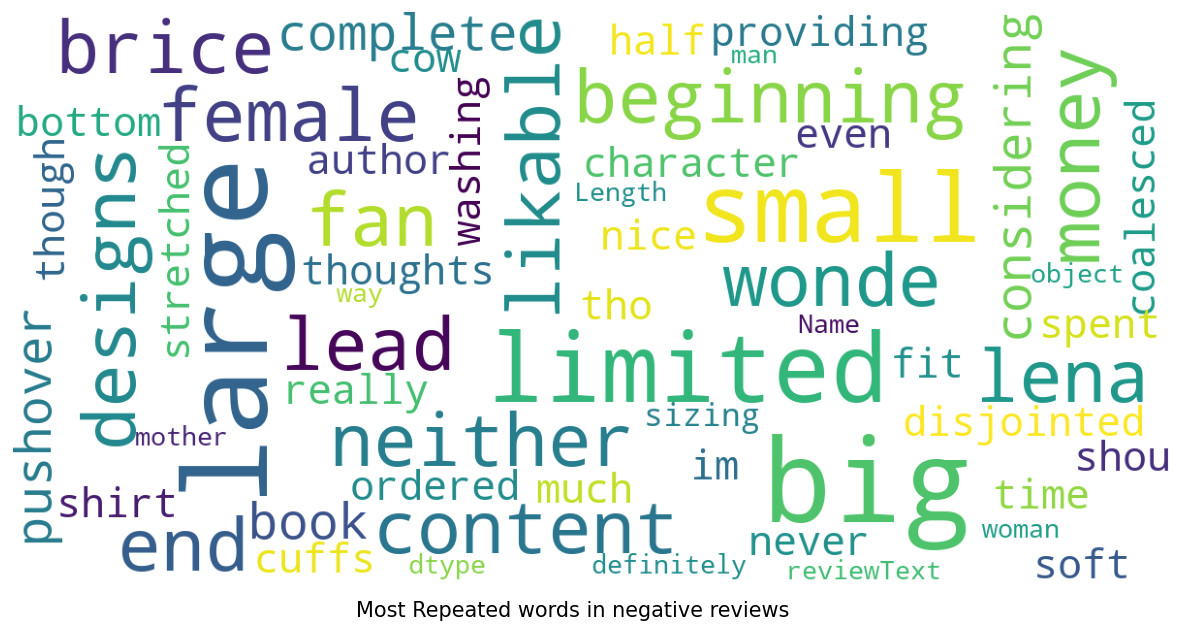

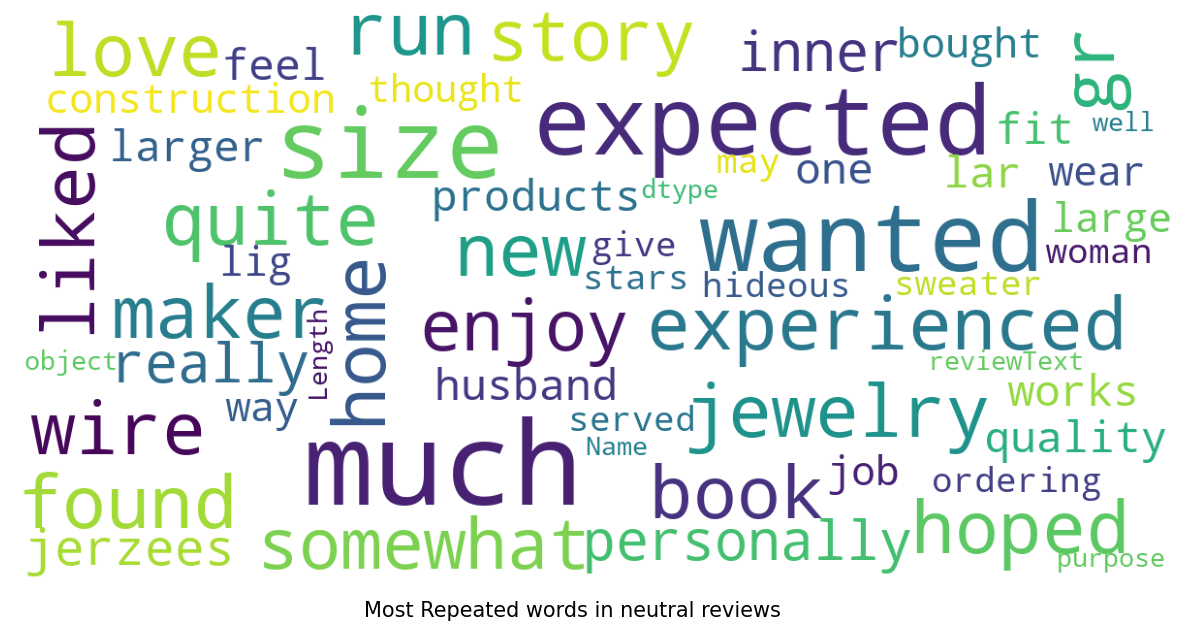

In [48]:
word_cloud(pos, "Most Repeated words in positive reviews")
word_cloud(neg, "Most Repeated words in negative reviews")
word_cloud(neu, "Most Repeated words in neutral reviews")

### TF-IDF (Term Frequency-Inverse Document Frequency)

In [49]:
X = df['reviewText']
Y = df['Sentiment']

In [50]:
Y.value_counts()

Positive    161798
Negative     21171
Neutral      16307
Name: Sentiment, dtype: int64

### LableEncoding

In [51]:
le = LabelEncoder()

Y = le.fit_transform(Y)

### Split the dataframe into train and test.

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### Applying TFIDF Vectorizer

In [53]:
myvector = TfidfVectorizer()
X_train = myvector.fit_transform(X_train)
X_test = myvector.transform(X_test)

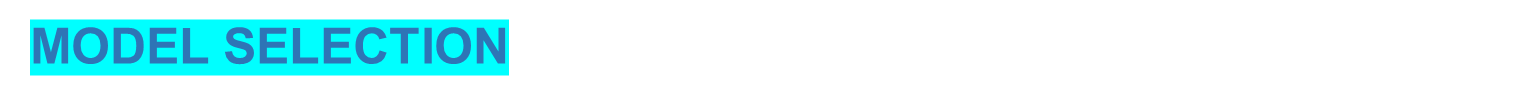

### NAIVE BAYES CLASSIFIER

In [57]:
model2 = MultinomialNB().fit(X_train, Y_train)
y_pred2 = model2.predict(X_test)

In [58]:
# Confusion matrix
cm = confusion_matrix(Y_test, y_pred2)

# F1 score
f1 = f1_score(Y_test, y_pred2, average='weighted')

# Precision
precision = precision_score(Y_test, y_pred2, average='weighted')

# Accuracy
accuracy = accuracy_score(Y_test, y_pred2)

print("Confusion Matrix:\n", cm,'\n')
print("F1 score: {:.2f}\n".format(f1))
print("Precision: {:.2f}\n".format(precision))
print("Accuracy: {:.2f}\n".format(accuracy))

Confusion Matrix:
 [[  468     2  3715]
 [   66     5  3192]
 [   23     3 32382]] 

F1 score: 0.76

Precision: 0.80

Accuracy: 0.82



In [59]:
print(classification_report(Y_test, y_pred2, target_names = df.Sentiment.value_counts().index))

              precision    recall  f1-score   support

    Positive       0.84      0.11      0.20      4185
    Negative       0.50      0.00      0.00      3263
     Neutral       0.82      1.00      0.90     32408

    accuracy                           0.82     39856
   macro avg       0.72      0.37      0.37     39856
weighted avg       0.80      0.82      0.76     39856



### DECISION TREE CLASSIFIER

In [60]:
model1 = DecisionTreeClassifier().fit(X_train, Y_train)
y_pred1 = model1.predict(X_test)

In [61]:
# Confusion matrix
cm = confusion_matrix(Y_test, y_pred1)

# F1 score
f1 = f1_score(Y_test, y_pred1, average='weighted')

# Precision
precision = precision_score(Y_test, y_pred1, average='weighted')

# Accuracy
accuracy = accuracy_score(Y_test, y_pred1)

print("Confusion Matrix:\n", cm,'\n')
print("F1 score: {:.2f}\n".format(f1))
print("Precision: {:.2f}\n".format(precision))
print("Accuracy: {:.2f}\n".format(accuracy))

Confusion Matrix:
 [[ 2188   554  1443]
 [  670   850  1743]
 [ 1305  1287 29816]] 

F1 score: 0.82

Precision: 0.82

Accuracy: 0.82



In [62]:
print(classification_report(Y_test, y_pred1, target_names = df.Sentiment.value_counts().index))

              precision    recall  f1-score   support

    Positive       0.53      0.52      0.52      4185
    Negative       0.32      0.26      0.29      3263
     Neutral       0.90      0.92      0.91     32408

    accuracy                           0.82     39856
   macro avg       0.58      0.57      0.57     39856
weighted avg       0.82      0.82      0.82     39856



### RANDOM FOREST CLASSIFIER

In [63]:
rf1 = RandomForestClassifier().fit(X_train, Y_train)
y_pred3 = rf1.predict(X_test)

In [64]:
# Confusion matrix
cm = confusion_matrix(Y_test, y_pred3)

# F1 score
f1 = f1_score(Y_test, y_pred3, average='weighted')

# Precision
precision = precision_score(Y_test, y_pred3, average='weighted')

# Accuracy
accuracy = accuracy_score(Y_test, y_pred3)

print("Confusion Matrix:\n", cm,'\n')
print("F1 score: {:.2f}\n".format(f1))
print("Precision: {:.2f}\n".format(precision))
print("Accuracy: {:.2f}\n".format(accuracy))

Confusion Matrix:
 [[ 1789    68  2328]
 [  315   441  2507]
 [  184    80 32144]] 

F1 score: 0.83

Precision: 0.85

Accuracy: 0.86



In [65]:
print(classification_report(Y_test, y_pred3, target_names = df.Sentiment.value_counts().index))

              precision    recall  f1-score   support

    Positive       0.78      0.43      0.55      4185
    Negative       0.75      0.14      0.23      3263
     Neutral       0.87      0.99      0.93     32408

    accuracy                           0.86     39856
   macro avg       0.80      0.52      0.57     39856
weighted avg       0.85      0.86      0.83     39856



Therefore for our Multiclass Classification Random Forrest has got the maximum F1 score ( 83%) as well as Accuracy score (86%)

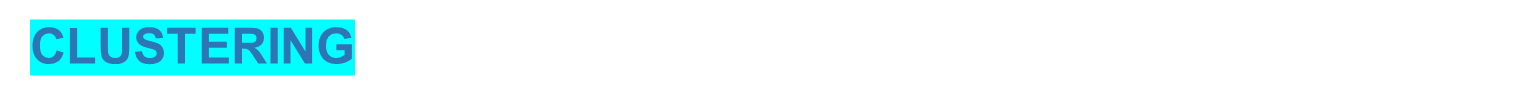

### Make a copy of original data

In [66]:
df_bck = df.copy()

### Select the columns to be used for clustering

In [67]:
X = df_bck[['compound', 'price']]

### Finding the optimal number of clusters using the elbow method

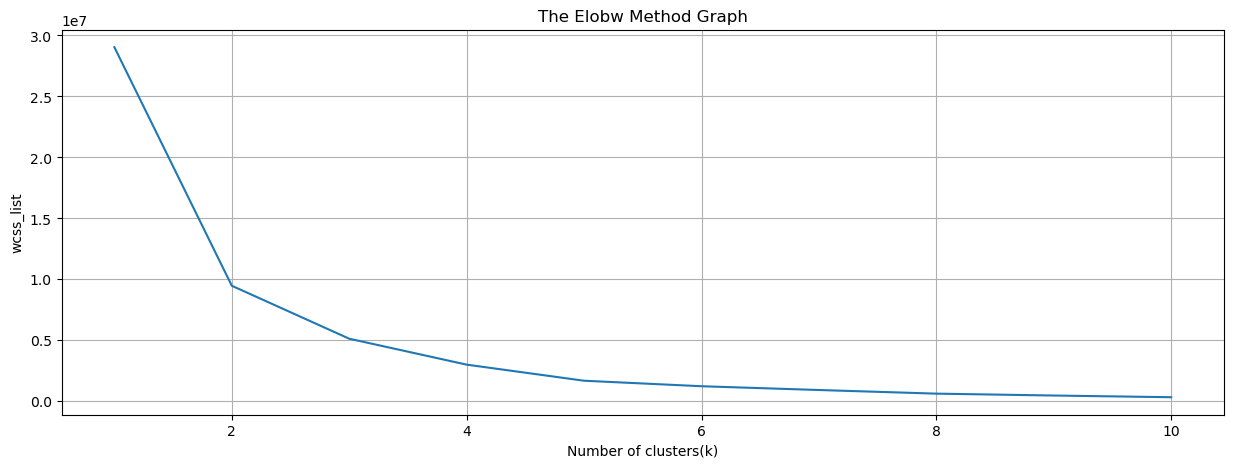

In [68]:
wcss_list= [] 

for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(X)  
    wcss_list.append(kmeans.inertia_) 

plt.figure(figsize = (15, 5)) 
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.grid(True);

### Training the K-means algorithm on the training dataset

In [69]:
X1 = X.values

In [70]:
model1 = KMeans(n_clusters = 3, random_state = 10).fit(X1)
pred = model1.fit_predict(X1)

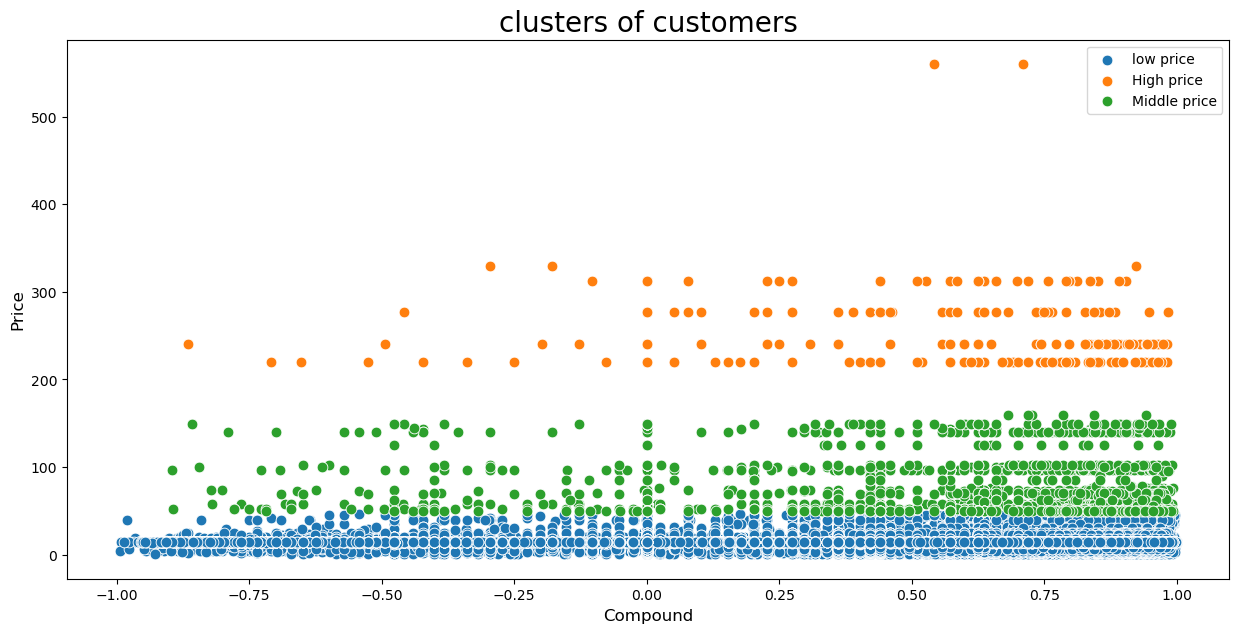

In [71]:
plt.figure(figsize=(15,7))
sns.scatterplot(x=X1[pred==0,0] ,y=X1[pred==0,1] ,s=60,label="low price")
sns.scatterplot(x=X1[pred==1,0] ,y=X1[pred==1,1],s=60,label="High price")
sns.scatterplot(x=X1[pred==2,0] ,y=X1[pred==2,1] ,s=60,label="Middle price")

plt.title("clusters of customers",fontsize=20)
plt.xlabel("Compound",fontsize=12)
plt.ylabel("Price",fontsize=12);

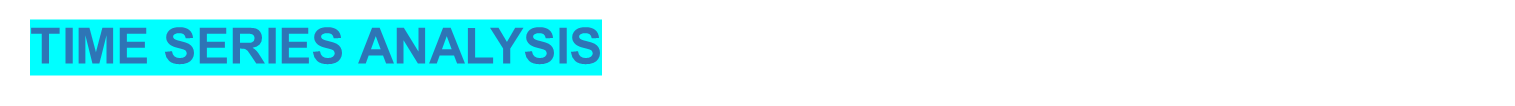

### For brand : Timex

In [72]:
ti = df[df['brand'] == 'Timex'][['neg', 'pos', 'neu', 'reviewTime']]

In [73]:
ti['reviewTime'] = pd.to_datetime(ti['reviewTime'])

### Set date as index

In [74]:
ti = ti.set_index('reviewTime')
ti.sort_index(True)
ti.head()

neg    pos    neu
reviewTime                     
2011-12-15  0.000  0.662  0.338
2011-10-10  0.000  0.926  0.074
2011-09-06  0.000  0.697  0.303
2011-04-13  0.135  0.096  0.769
2011-03-19  0.000  0.804  0.196

### For brand : SPERRY

In [75]:
sp = df[df['brand'] == 'SPERRY'][['neg', 'pos', 'neu', 'reviewTime']]

In [76]:
sp['reviewTime'] = pd.to_datetime(sp['reviewTime'])

### Set date as index

In [77]:
sp = sp.set_index('reviewTime')
sp.sort_index(True)
sp.head()

neg    pos    neu
reviewTime                     
2007-12-23  0.000  1.000  0.000
2007-03-09  0.000  0.401  0.599
2006-11-15  0.000  0.787  0.213
2006-08-29  0.000  0.000  1.000
2018-05-06  0.214  0.052  0.734

### Resampling the data month wise

In [78]:
ti = ti.resample('M').sum()
ti.shape

(174, 3)

In [79]:
sp = sp.resample('M').sum()
sp.shape

(148, 3)

## For brand : Timex

### Seasonal Decompose  For Positive Reviews

In [80]:
decomposition=seasonal_decompose(ti['pos'], period=12)
d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid

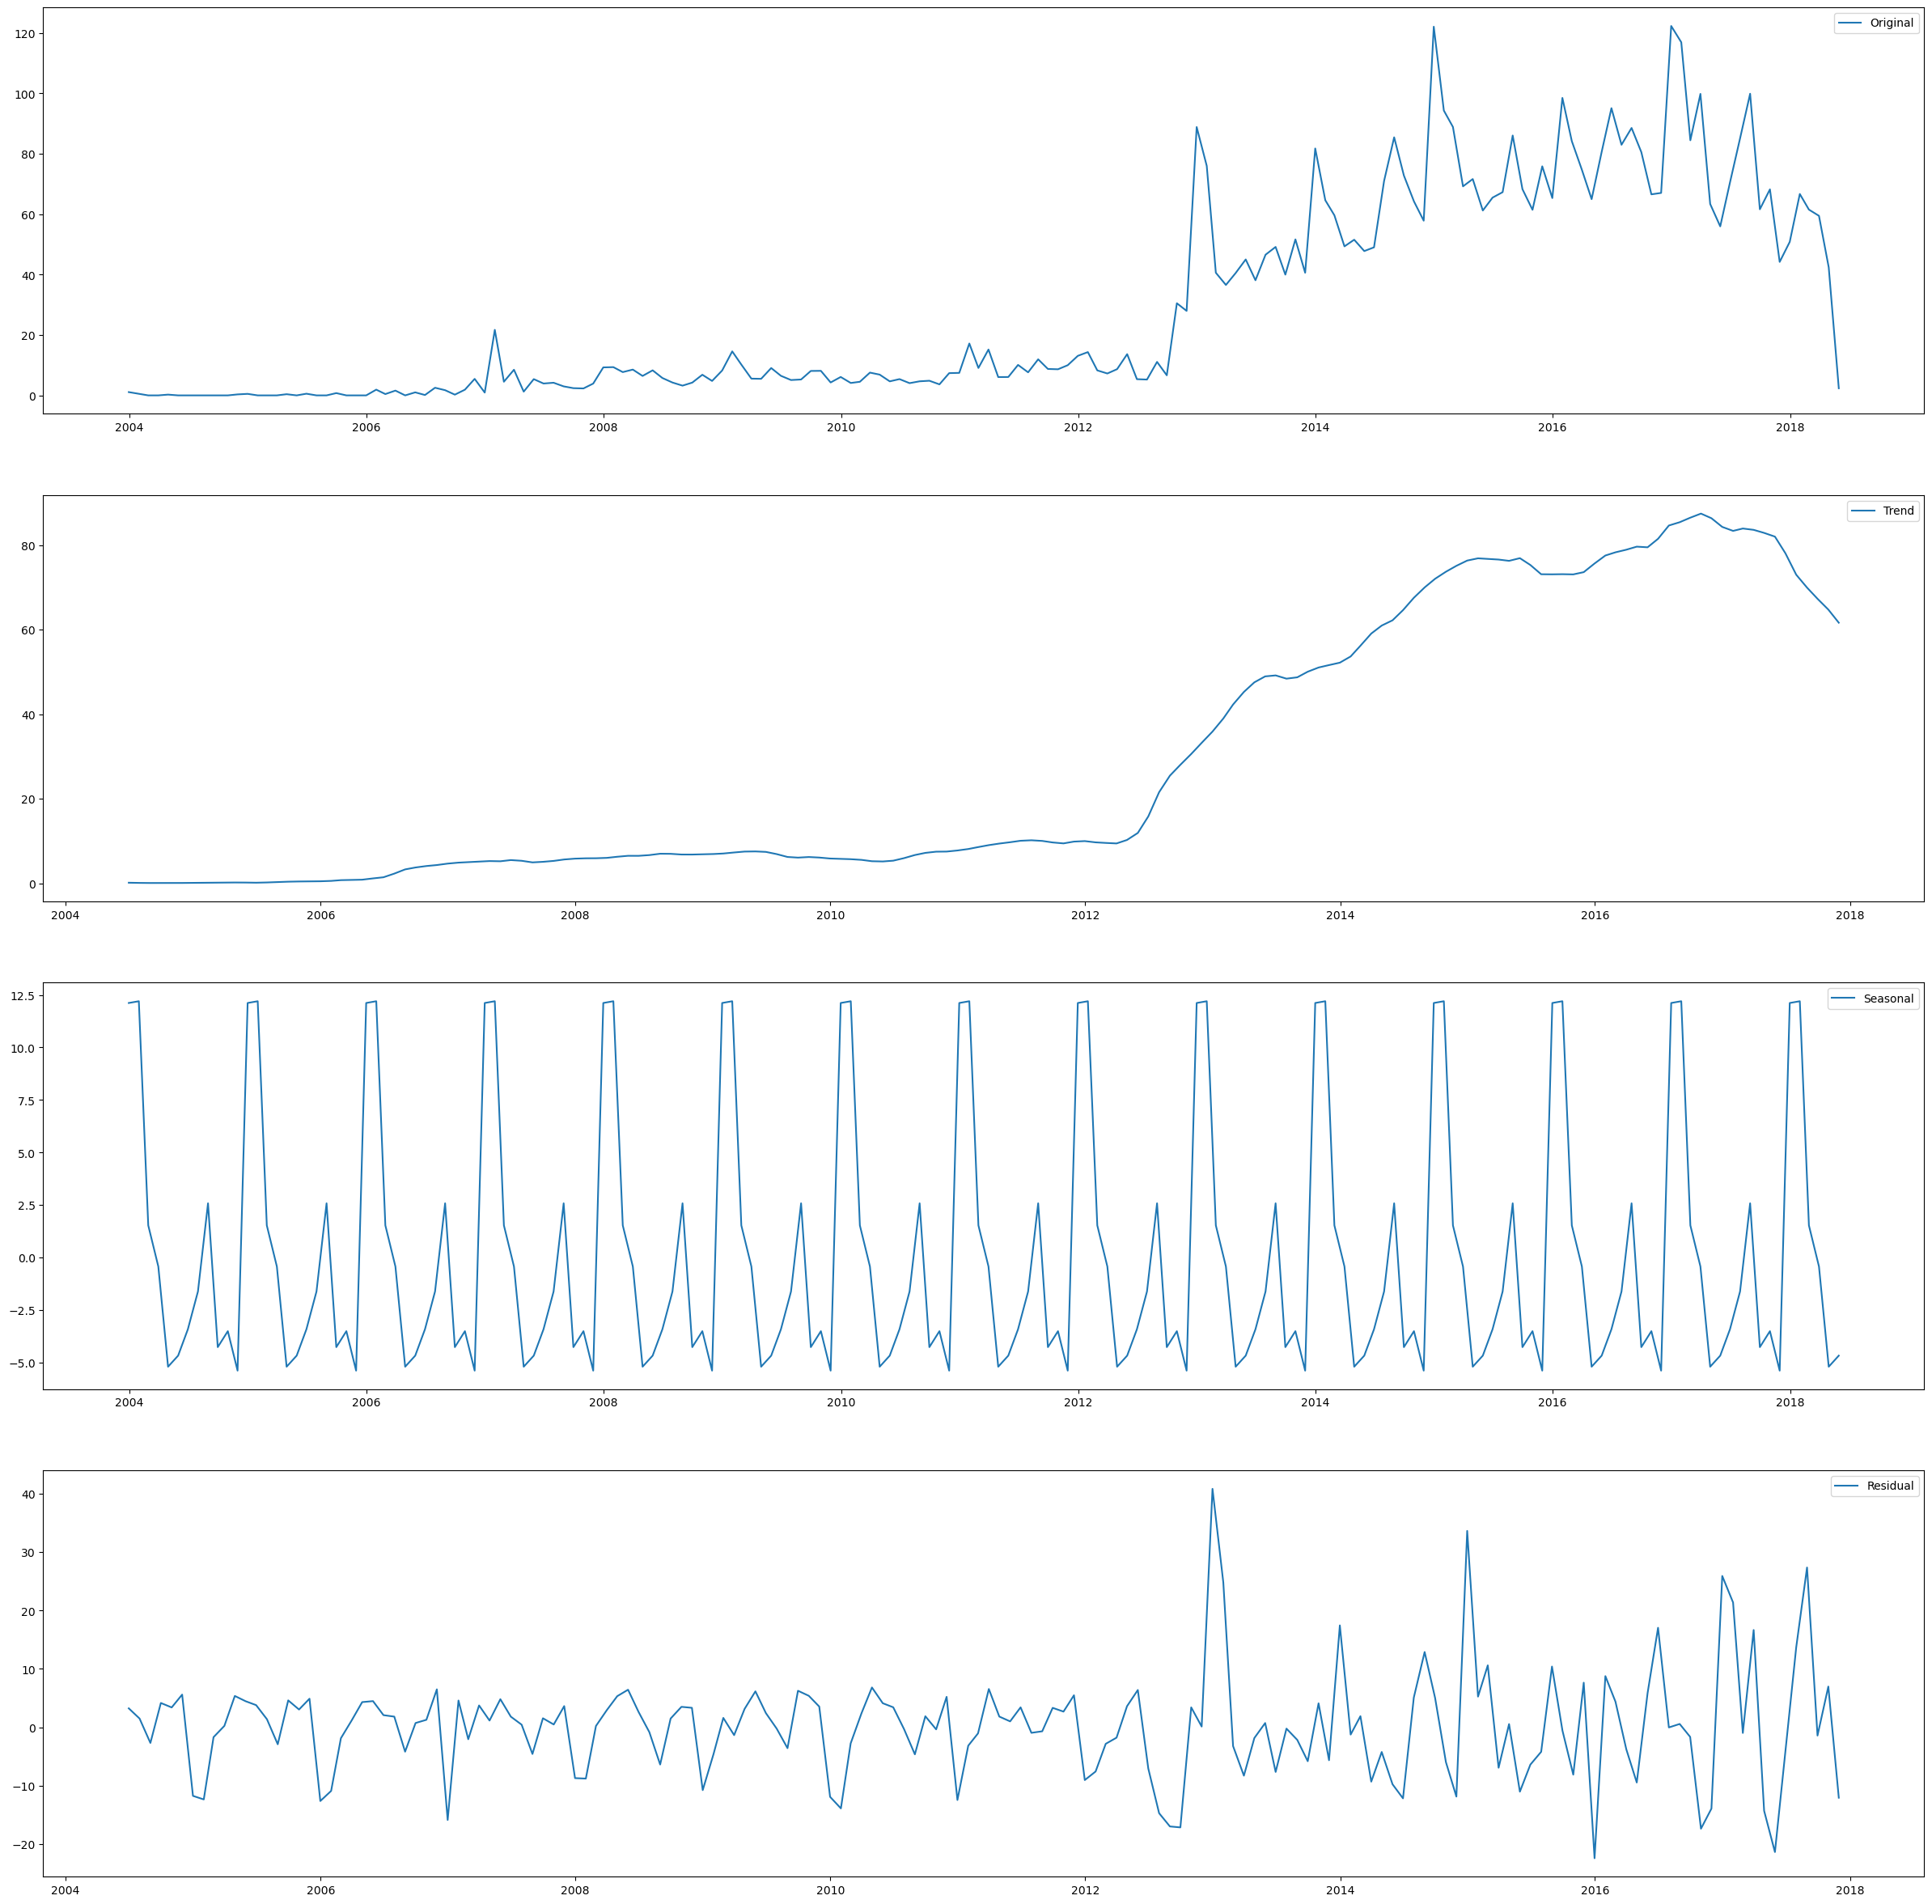

In [81]:
fig,ax = plt.subplots(4,2,figsize=(30,30))

plt.subplot(411)
plt.plot(ti['pos'],label='Original')
plt.legend()

plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend();

### Seasonal Decompose  For Neutral Reviews

In [82]:
decomposition=seasonal_decompose(ti['neu'], period=12)
d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid

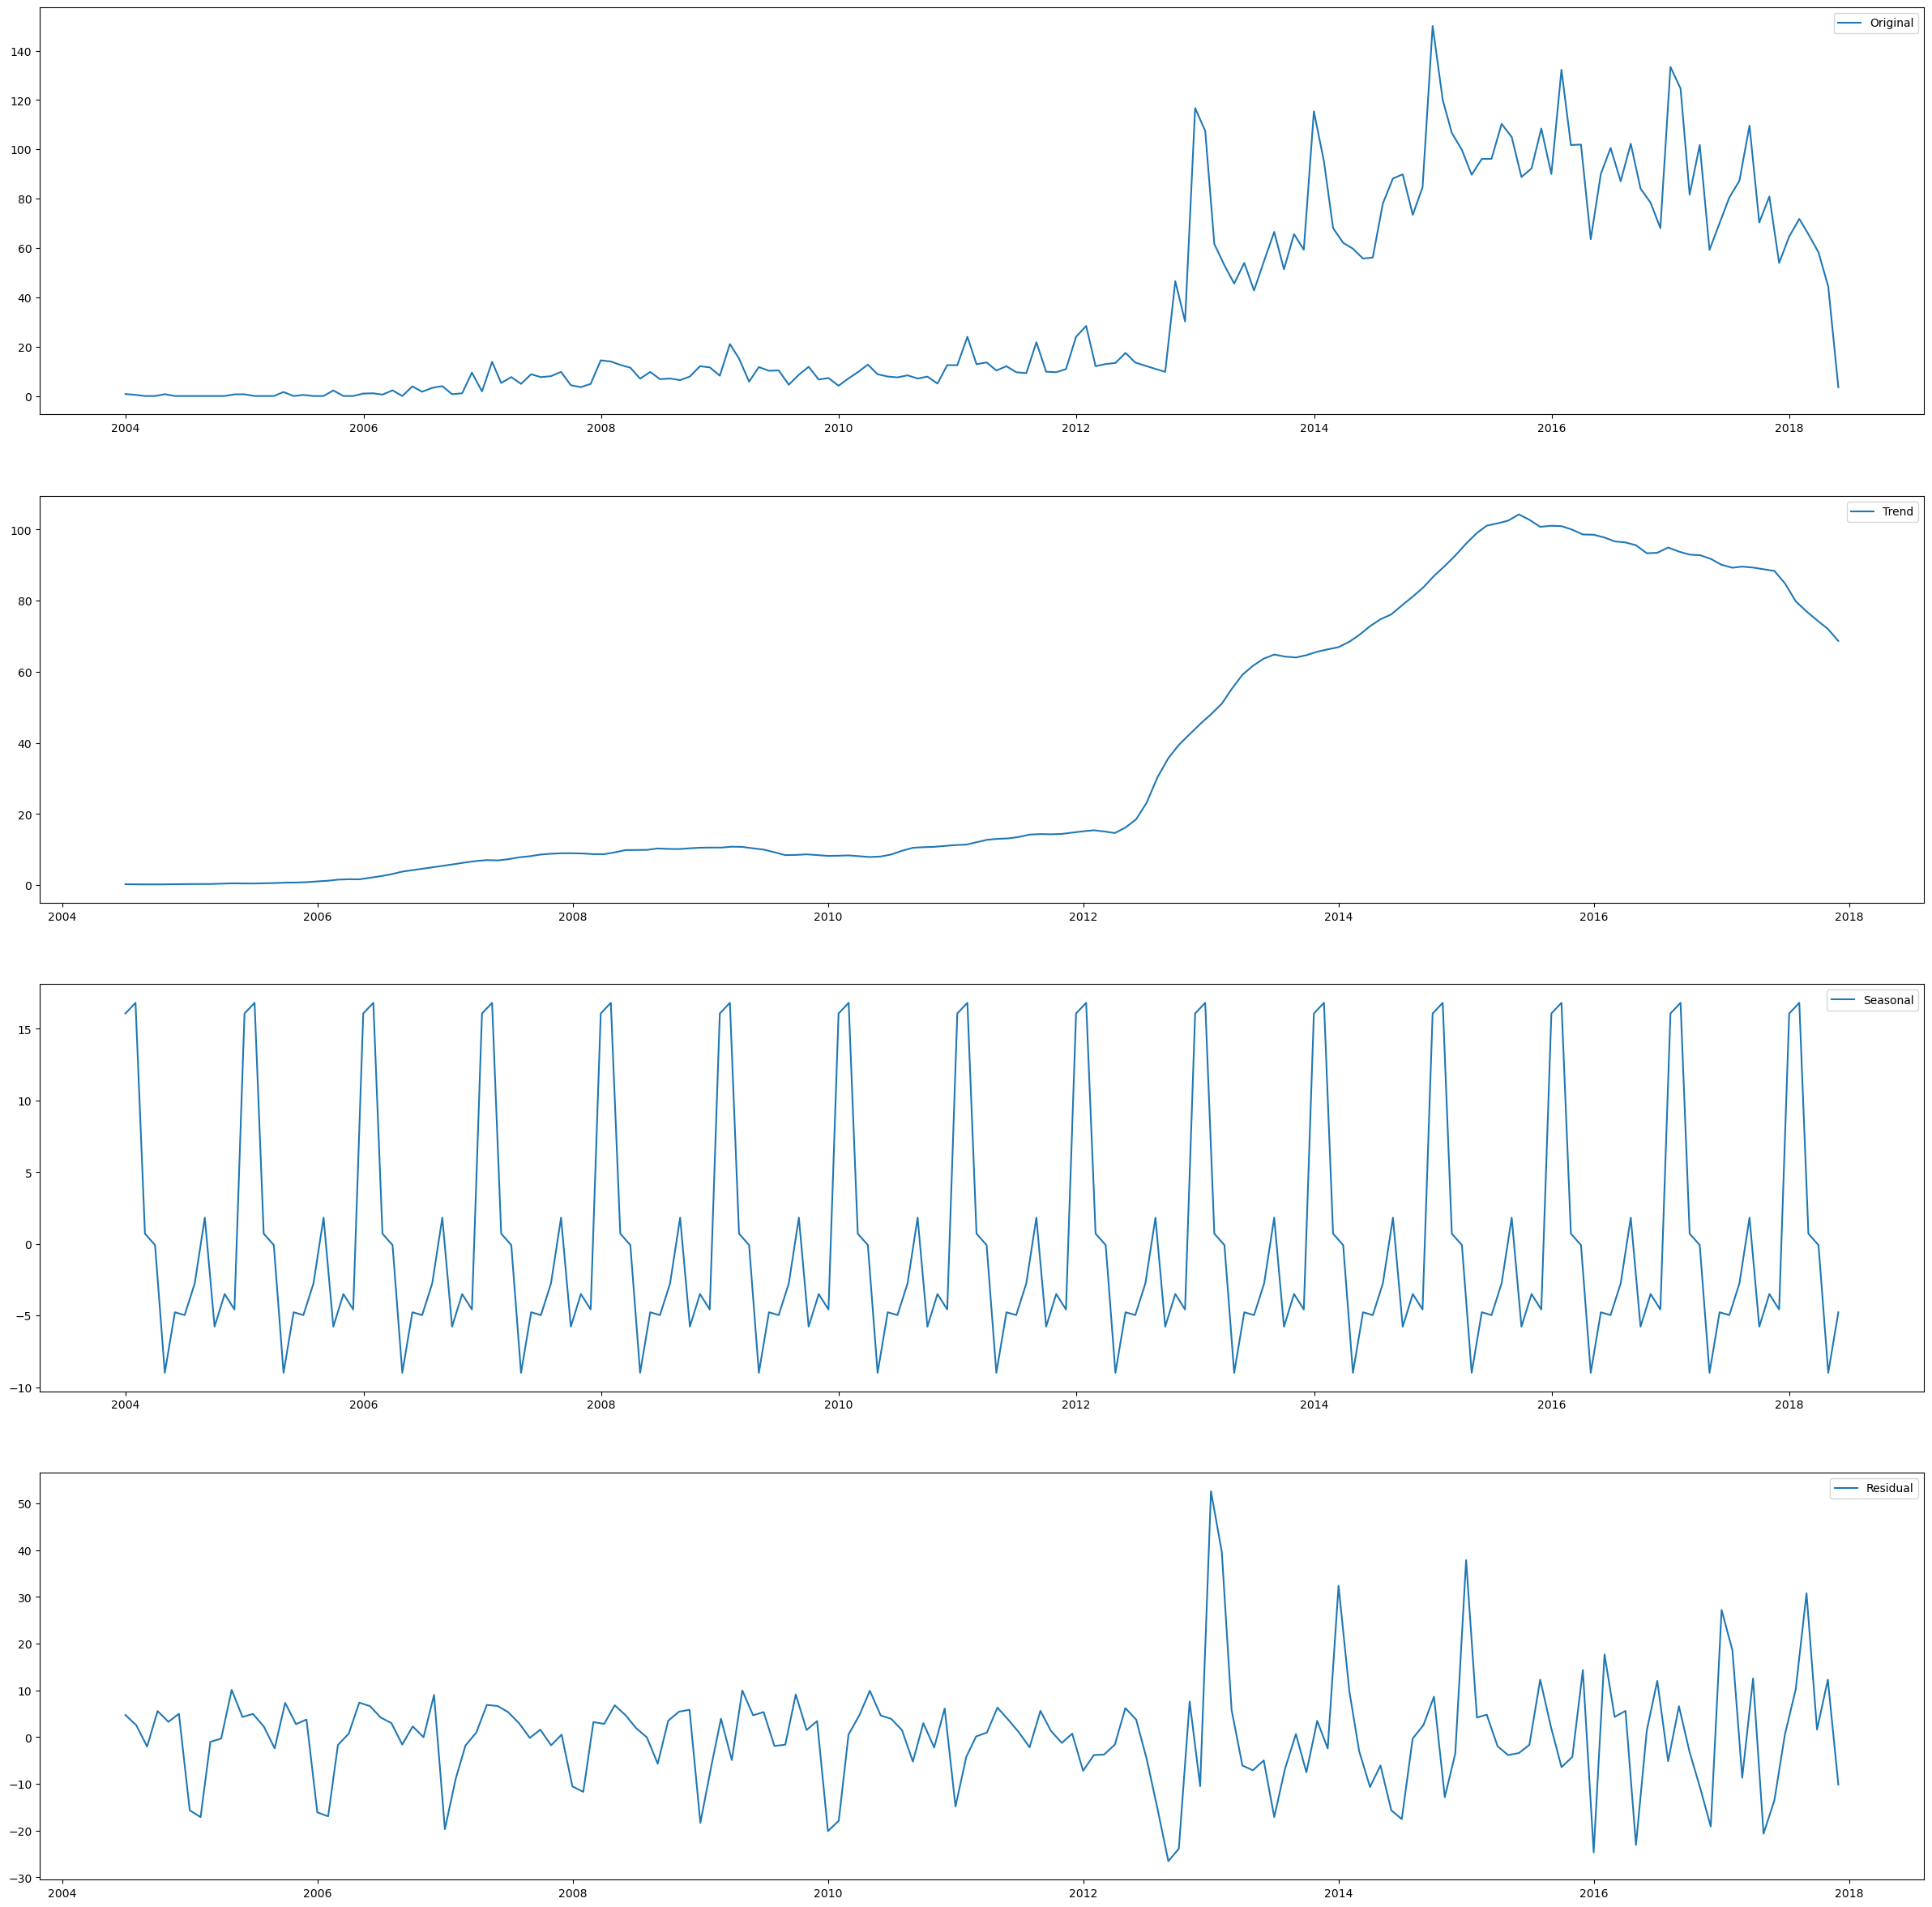

In [83]:
fig,ax = plt.subplots(4,2,figsize=(30,30))

plt.subplot(411)
plt.plot(ti['neu'],label='Original')
plt.legend()

plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend();

### Seasonal Decompose  For Negative Reviews

In [84]:
decomposition=seasonal_decompose(ti['neg'], period=12)
d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid

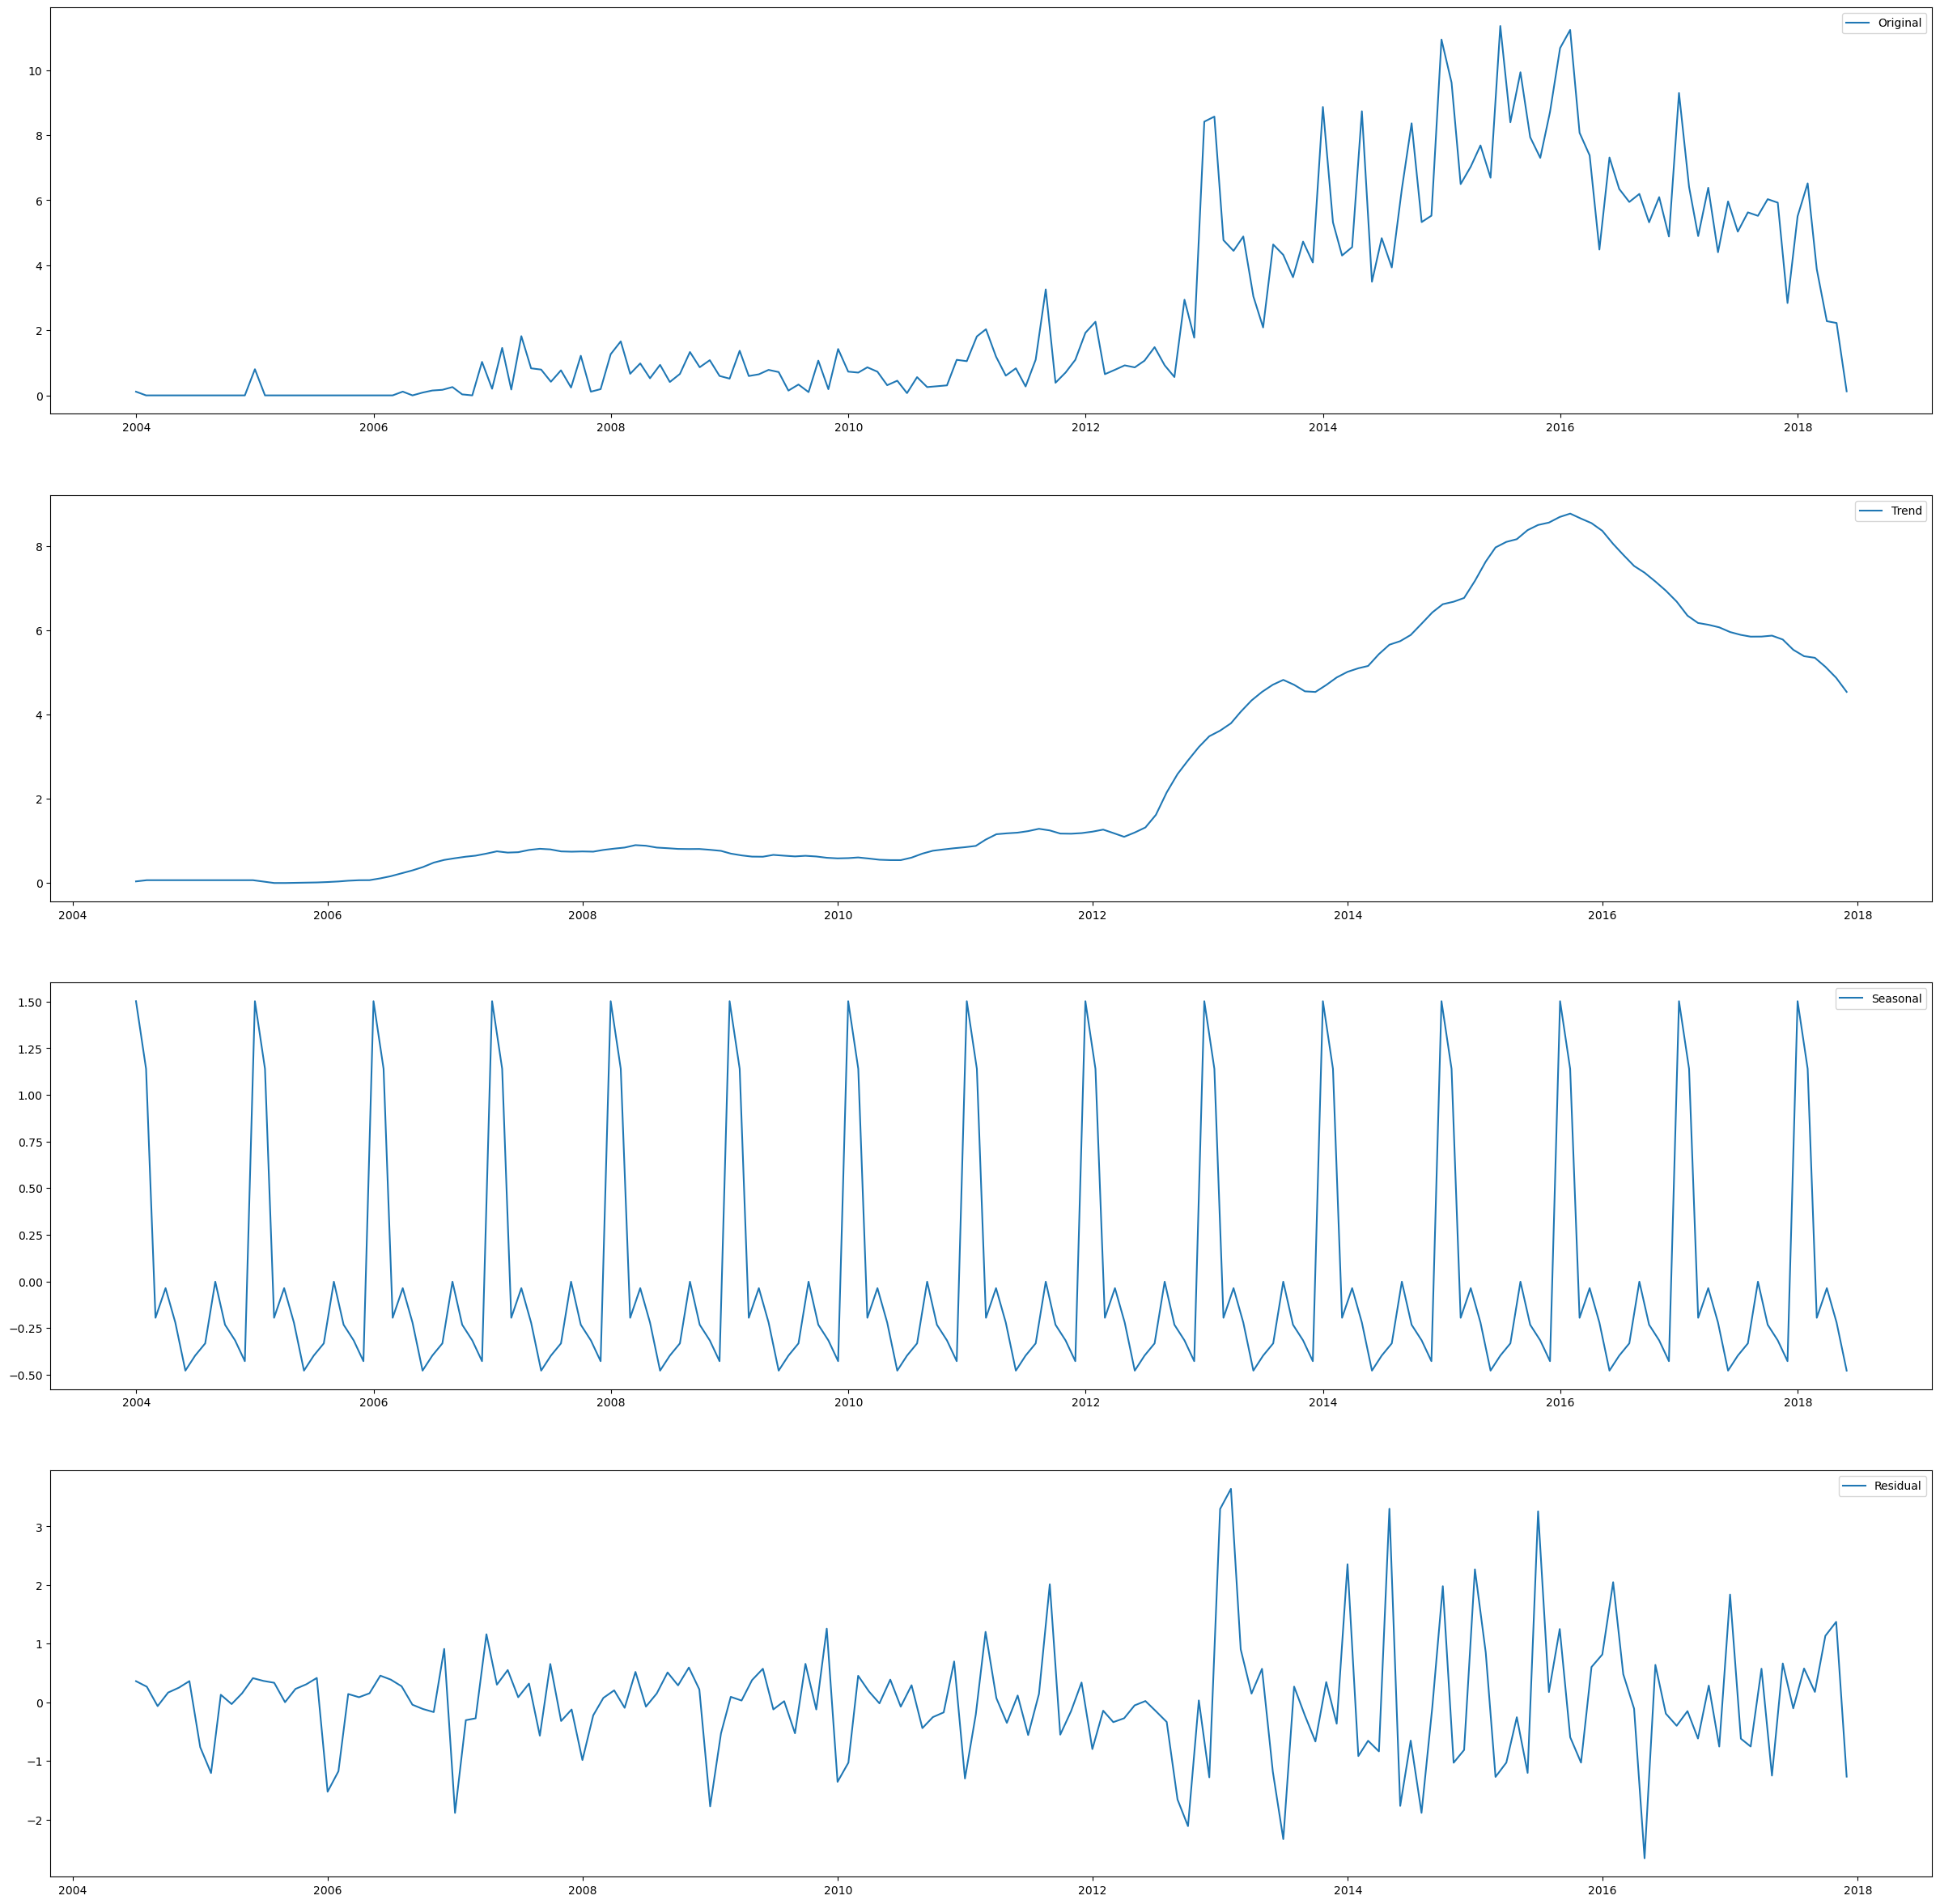

In [85]:
fig,ax = plt.subplots(4,2,figsize=(30,30))

plt.subplot(411)
plt.plot(ti['neg'],label='Original')
plt.legend()

plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend();

### Creating function to check stationarity

In [86]:
def checkstationary(df):
    pvalue = adfuller(df)[1]
    if pvalue < 0.05:
        ret = 'Pvalue:{}. Data is stationary, Proceed to model building'.format(pvalue)
    else:
        ret = 'Pvalue:{}.Data is not stationary, make data stationary'.format(pvalue)
    return ret

In [87]:
# Checking Stationarity of positive Sentiment Column
checkstationary(ti['pos'])

'Pvalue:0.48184227376184274.Data is not stationary, make data stationary'

In [88]:
# Checking Stationarity of neutral Sentiment Column
checkstationary(ti['neu'])

'Pvalue:0.47737272436311107.Data is not stationary, make data stationary'

In [89]:
# Checking Stationarity of Negative Sentiment Column
checkstationary(ti['neg'])

'Pvalue:0.5355950253919679.Data is not stationary, make data stationary'

### Calculate rolling mean and subtract it from the data

In [90]:
rolling_mean = ti['pos'].rolling(window=3).mean()
df_trend = ti['pos'] -   rolling_mean       
df_trend.dropna(inplace=True)

# Calculate seasonal component and subtract it from the data
df_seasonal = ti['pos'] - df_trend
df_seasonal.dropna(inplace=True)### Calculate rolling mean and subtract it from the data

# First order differencing
df_diff = df_seasonal.diff().dropna()

In [91]:
rolling_mean1 = ti['neu'].rolling(window=15).mean()
df_trend1 = ti['neu'] - rolling_mean1
df_trend1.dropna(inplace=True)

# Calculate seasonal component and subtract it from the data
df_seasonal1 = ti['neu'] - df_trend1
df_seasonal1.dropna(inplace=True)

# First order differencing
df_diff1 = df_seasonal1.diff().dropna()

In [92]:
rolling_mean2 = ti['neg'].rolling(window=5).mean()
df_trend2 = ti['neg'] - rolling_mean2
df_trend2.dropna(inplace=True)

# Calculate seasonal component and subtract it from the data
df_seasonal2 = ti['neg'] - df_trend2
df_seasonal2.dropna(inplace=True)

# First order differencing
df_diff2 = df_seasonal2.diff().dropna()

### check stationarity for positive column

In [93]:
checkstationary(df_diff)

'Pvalue:0.04727581841563196. Data is stationary, Proceed to model building'

### check stationarity for neutral column

In [94]:
checkstationary(df_diff1)

'Pvalue:0.161208669222339.Data is not stationary, make data stationary'

### check stationarity for negative column

In [95]:
checkstationary(df_diff2)

'Pvalue:0.03639307789222519. Data is stationary, Proceed to model building'

In [96]:
df_time_ti = pd.concat([df_diff, df_diff1, df_diff2], axis=1, keys=['pos','neu','neg'])
df_time_ti.head()

pos  neu     neg
reviewTime                           
2004-03-31 -3.626667e-01  NaN     NaN
2004-04-30 -9.066667e-02  NaN     NaN
2004-05-31  1.387779e-17  NaN -0.0228
2004-06-30  0.000000e+00  NaN  0.0000
2004-07-31 -8.633333e-02  NaN  0.0000

In [97]:
df_time_ti.dropna(inplace=True)

In [98]:
df_time_ti.isnull().sum()

pos    0
neu    0
neg    0
dtype: int64

###  ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) For positive

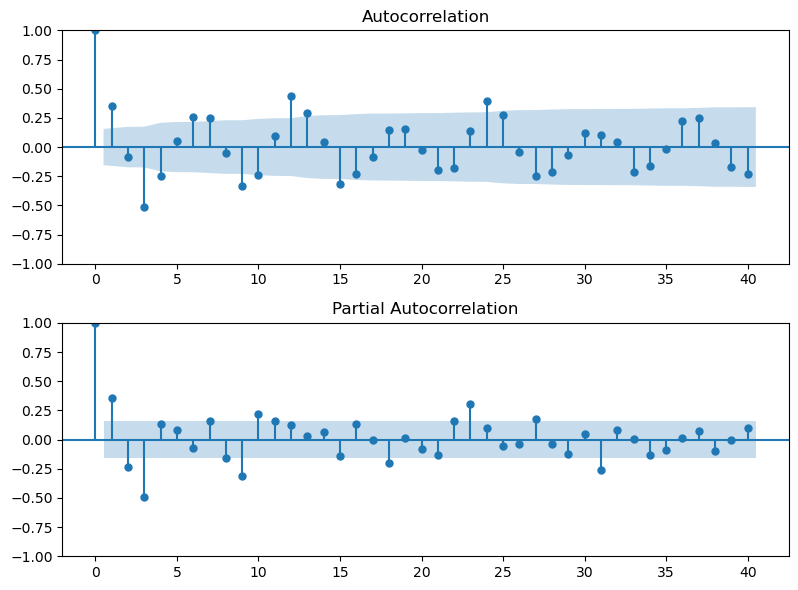

In [99]:
from statsmodels.tsa.stattools import adfuller,acf,pacf
import statsmodels.api as sm

fig = plt.figure(figsize=(8, 6))

# Show ACF
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(df_time_ti['pos'], lags=40, ax=ax1)

# Show PACF
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(df_time_ti['pos'], lags=40, ax=ax2)

plt.tight_layout()

###  ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) For neutral

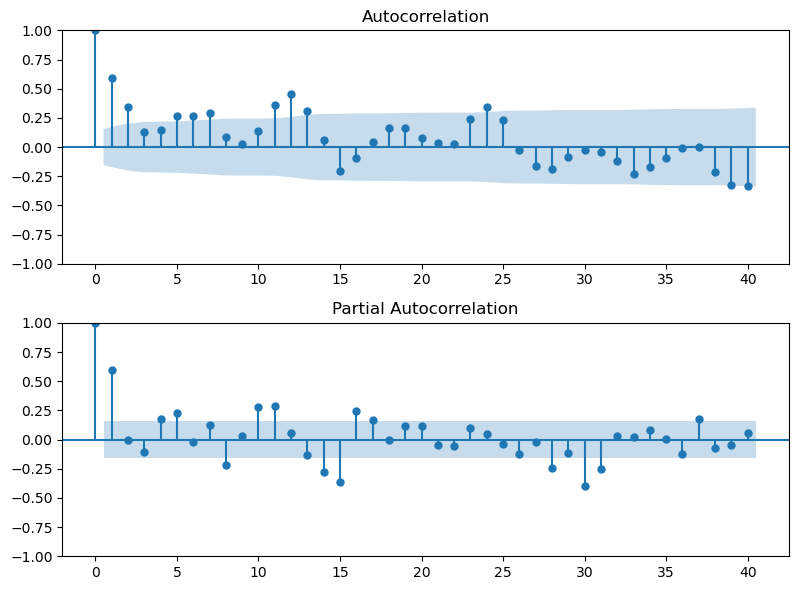

In [100]:
fig = plt.figure(figsize=(8, 6))

# Show ACF
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(df_time_ti['neu'], lags=40, ax=ax1)

# Show PACF
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(df_time_ti['neu'], lags=40, ax=ax2)

plt.tight_layout()

###  ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) For negative

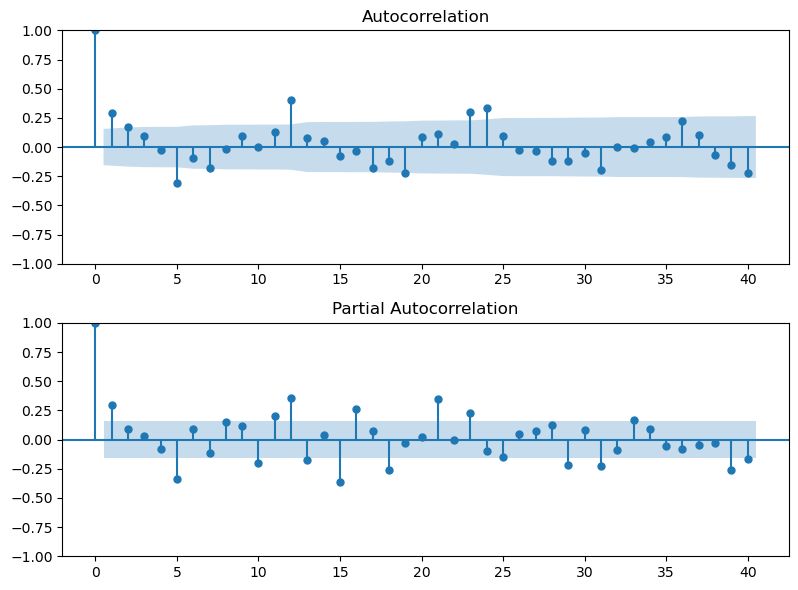

In [101]:
fig = plt.figure(figsize=(8, 6))

# Show ACF
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(df_time_ti['neg'], lags=40, ax=ax1)

# Show PACF
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(df_time_ti['neg'], lags=40, ax=ax2)

plt.tight_layout()

In [102]:
#!pip install pmdarima

### Creating function to get optimum p and q value

### For positive column

In [103]:
import pmdarima as pm

# fit ARIMA model using auto_arima
model = pm.auto_arima(df_time_ti['pos'], start_p=1, start_q=1, max_p=5, max_q=5,
                      seasonal=False, trace=True, error_action='ignore', 
                      suppress_warnings=True, stepwise=True)

# print summary
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1016.890, Time=0.45 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1037.861, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1017.398, Time=0.22 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1017.906, Time=0.17 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=995.983, Time=0.23 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1009.833, Time=0.13 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=966.246, Time=0.43 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=966.699, Time=0.18 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=966.057, Time=0.45 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=964.909, Time=0.20 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=965.332, Time=0.21 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=964.544, Time=0.38 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=inf, Time=0.93 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=inf, Time=0.87 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=966.270,

### For neutral column

In [104]:
# fit ARIMA model using auto_arima
model1 = pm.auto_arima(df_time_ti['neu'], start_p=1, start_q=1, max_p=5, max_q=5,
                      seasonal=False, trace=True, error_action='ignore', 
                      suppress_warnings=True, stepwise=True)

# print summary
print(model1.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=593.127, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=667.896, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=591.286, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=617.453, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=593.092, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=594.538, Time=0.16 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=592.013, Time=0.06 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.560 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  159
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -293.643
Date:                Thu, 13 Apr 2023   AIC                            591.286
Time:                        12:18:51   BIC                            597.424
Sample:                    03-

### For negative column

In [105]:
# fit ARIMA model using auto_arima
model1 = pm.auto_arima(df_time_ti['neg'], start_p=1, start_q=1, max_p=5, max_q=5,
                      seasonal=False, trace=True, error_action='ignore', 
                      suppress_warnings=True, stepwise=True)

# print summary
print(model1.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=141.967, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=154.127, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=141.250, Time=0.16 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=144.215, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=141.850, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=143.784, Time=0.16 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=143.127, Time=0.11 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.873 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  159
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 -68.625
Date:                Thu, 13 Apr 2023   AIC                            141.250
Time:                        12:18:52   BIC                            147.388
Sample:                    03-

### Splitting the data

In [106]:
split = int(0.95 * len(df_time_ti))
train = df_time_ti.iloc[:split]
test = df_time_ti.iloc[split:]
print("Train = {}, Test = {}".format(len(train), len(test)))

Train = 151, Test = 8


### Model building

### Creating function for sarima model for positive sentiment

In [107]:
def SARMA1(df):
    model2 = SARIMAX(train['pos'],order=(5, 0, 1),seasonal_order=(5,0,1,12)).fit()
    print('Summary : S')
    print('past_predictions : past')
    print('future_predictions : future')
    select = input('Enter you requried information: ')
    summary  = model2.summary()
    pred1 = model2.predict()
    forecast1 = model2.forecast(len(test['pos'])+20)
    if select == 'S':
        return summary
    elif select == 'past':
        return pred1
    else:
        return forecast1

### Creating function for sarima model for neutral sentiment

In [108]:
def SARMA2(df):
    model2 = SARIMAX(train['neu'],order=(1, 0, 0),seasonal_order=(1,0,0,12)).fit()
    print('Summary : S')
    print('past_predictions : past')
    print('future_predictions : future')
    select = input('Enter you requried information: ')
    summary  = model2.summary()
    pred1 = model2.predict()
    forecast1 = model2.forecast(len(test['neu'])+20)
    if select == 'S':
        return summary
    elif select == 'past':
        return pred1
    else:
        return forecast1

### Creating function for sarima model for negative sentiment

In [109]:
def SARMA3(df):
    model2 = SARIMAX(train['neg'],order=(1, 0, 0),seasonal_order=(1,0,0,12)).fit()
    print('Summary : S')
    print('past_predictions : past')
    print('future_predictions : future')
    select = input('Enter you requried information: ')
    summary  = model2.summary()
    pred1 = model2.predict()
    forecast1 = model2.forecast(len(test['neg'])+20)
    if select == 'S':
        return summary
    elif select == 'past':
        return pred1
    else:
        return forecast1

In [110]:
train1 = SARMA1(train['pos'])

C:\Users\patel\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Summary : S
past_predictions : past
future_predictions : future
Enter you requried information: df


In [111]:
train2 = SARMA2(train['neu'])

Summary : S
past_predictions : past
future_predictions : future
Enter you requried information: df


In [112]:
train3 = SARMA3(train['neg'])

Summary : S
past_predictions : past
future_predictions : future
Enter you requried information: df


## Plot graph Actual vs forecast for positive

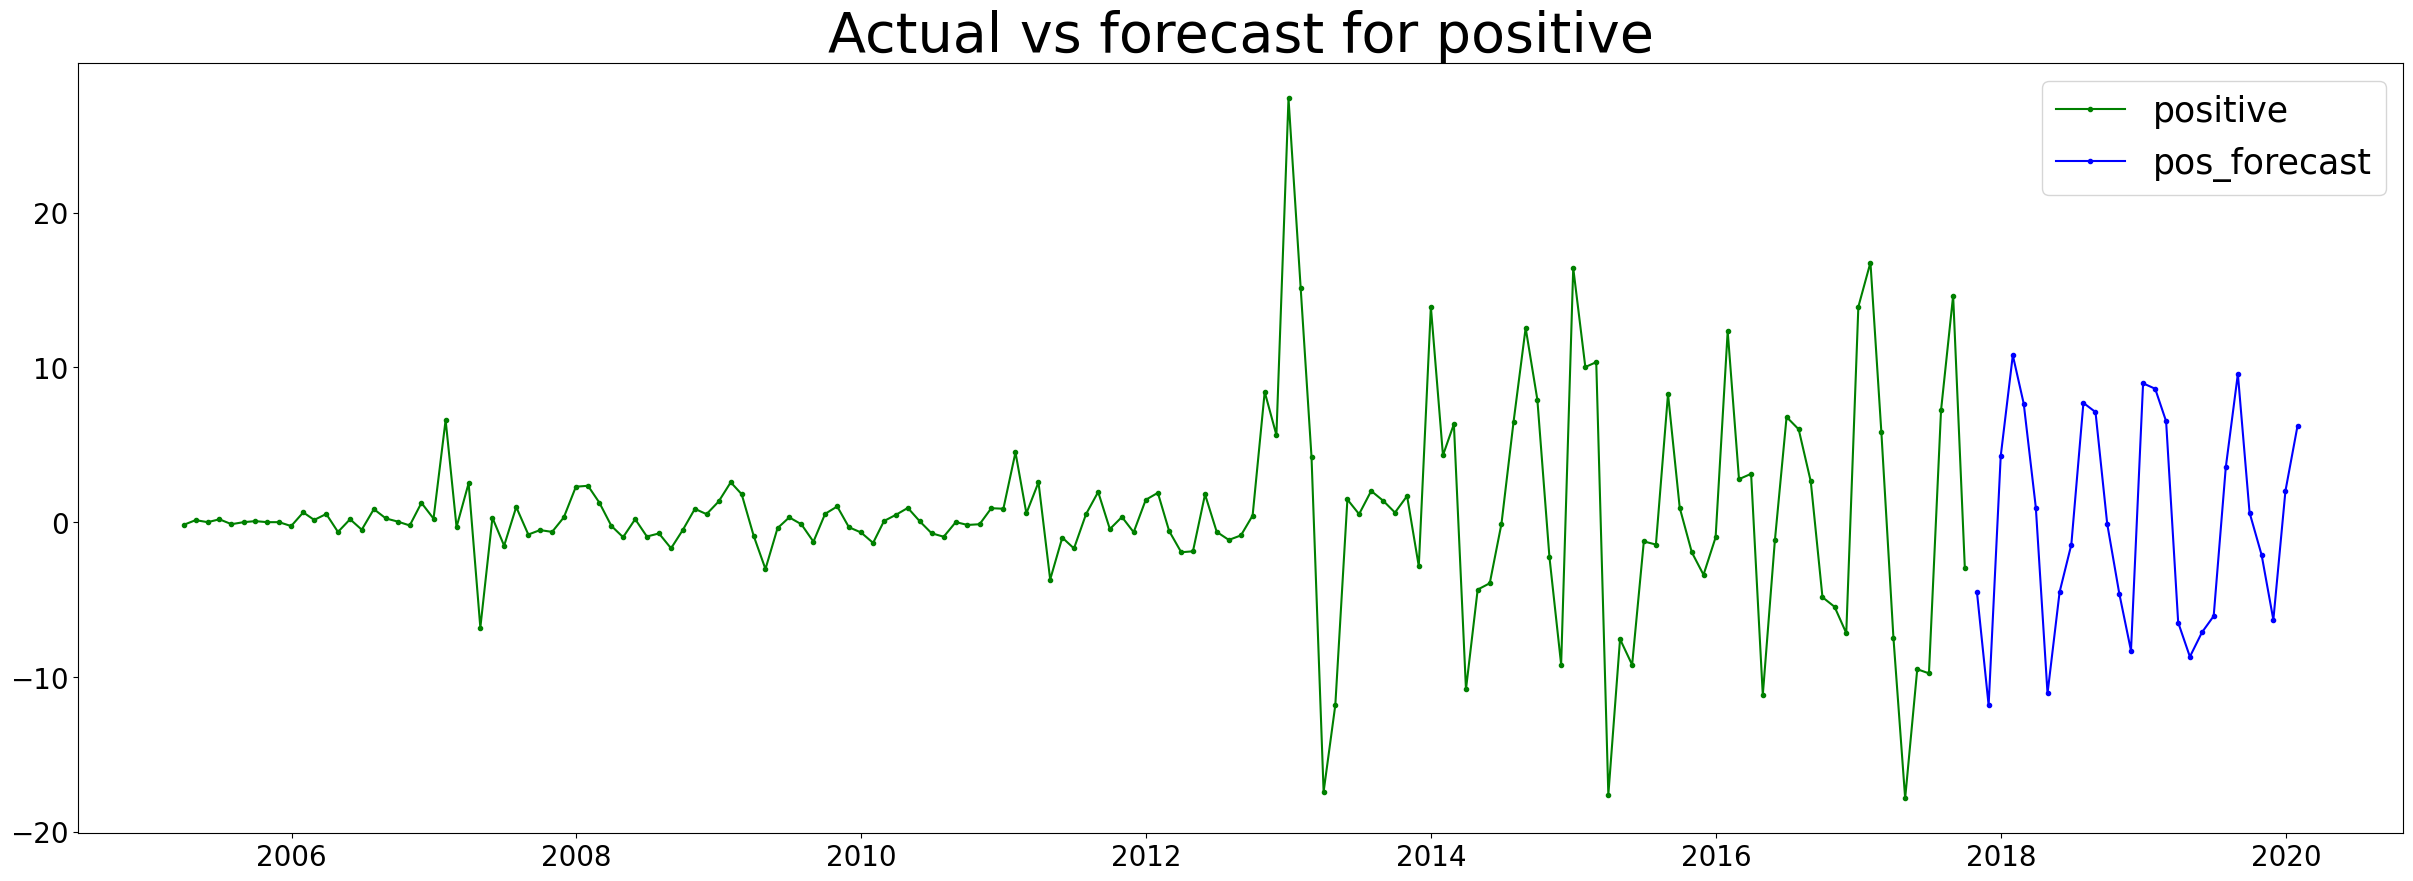

In [113]:
plt.figure(figsize=(30,10))
plt.title('Actual vs forecast for positive',fontsize=40)
plt.plot(train['pos'],marker = '.', label = 'positive', color = 'g')
plt.plot(train1,marker = '.', label = 'pos_forecast', color = 'b')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=25);

## Plot graph Actual vs forecast for neutral

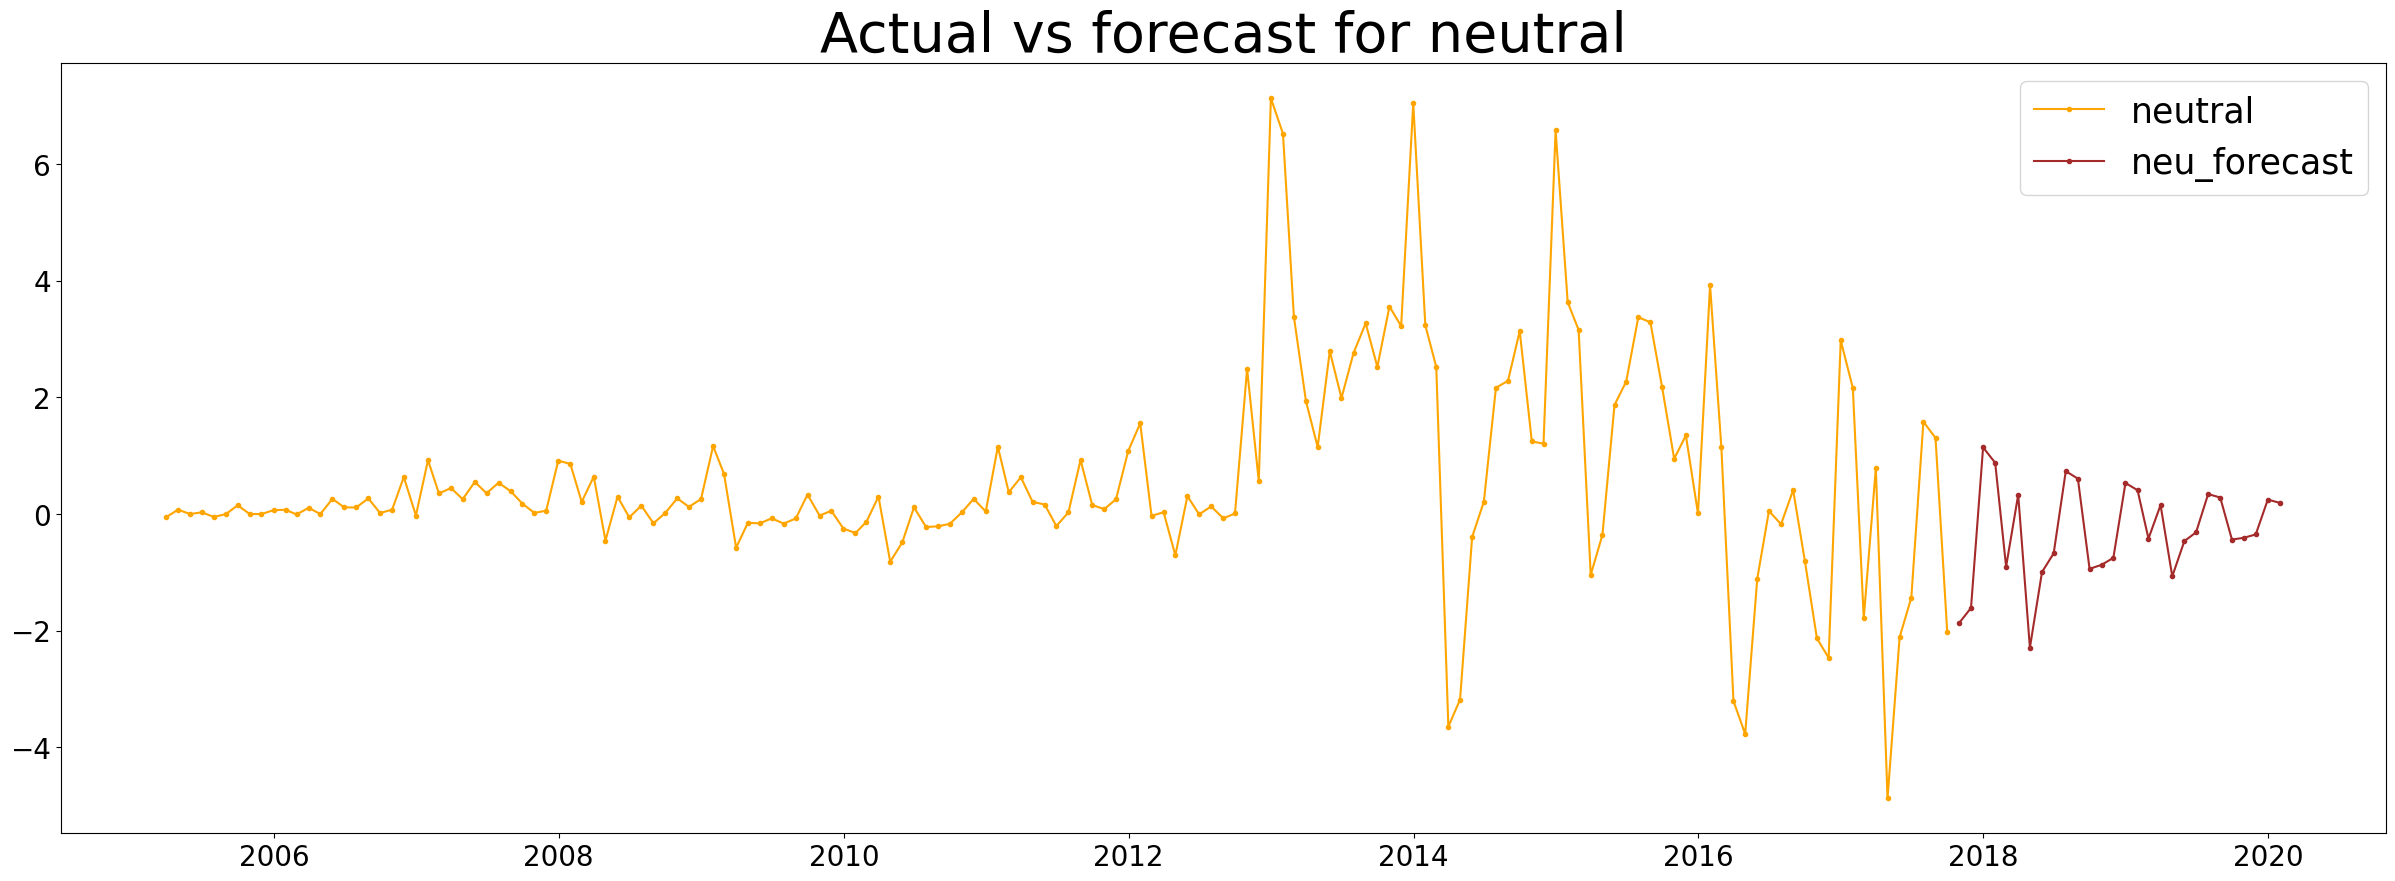

In [114]:
plt.figure(figsize=(30,10))
plt.title('Actual vs forecast for neutral',fontsize=40)
plt.plot(train['neu'],marker = '.', label = 'neutral', color = 'orange')
plt.plot(train2,marker = '.', label = 'neu_forecast', color = 'brown')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=25);

## Plot graph Actual vs forecast for negative

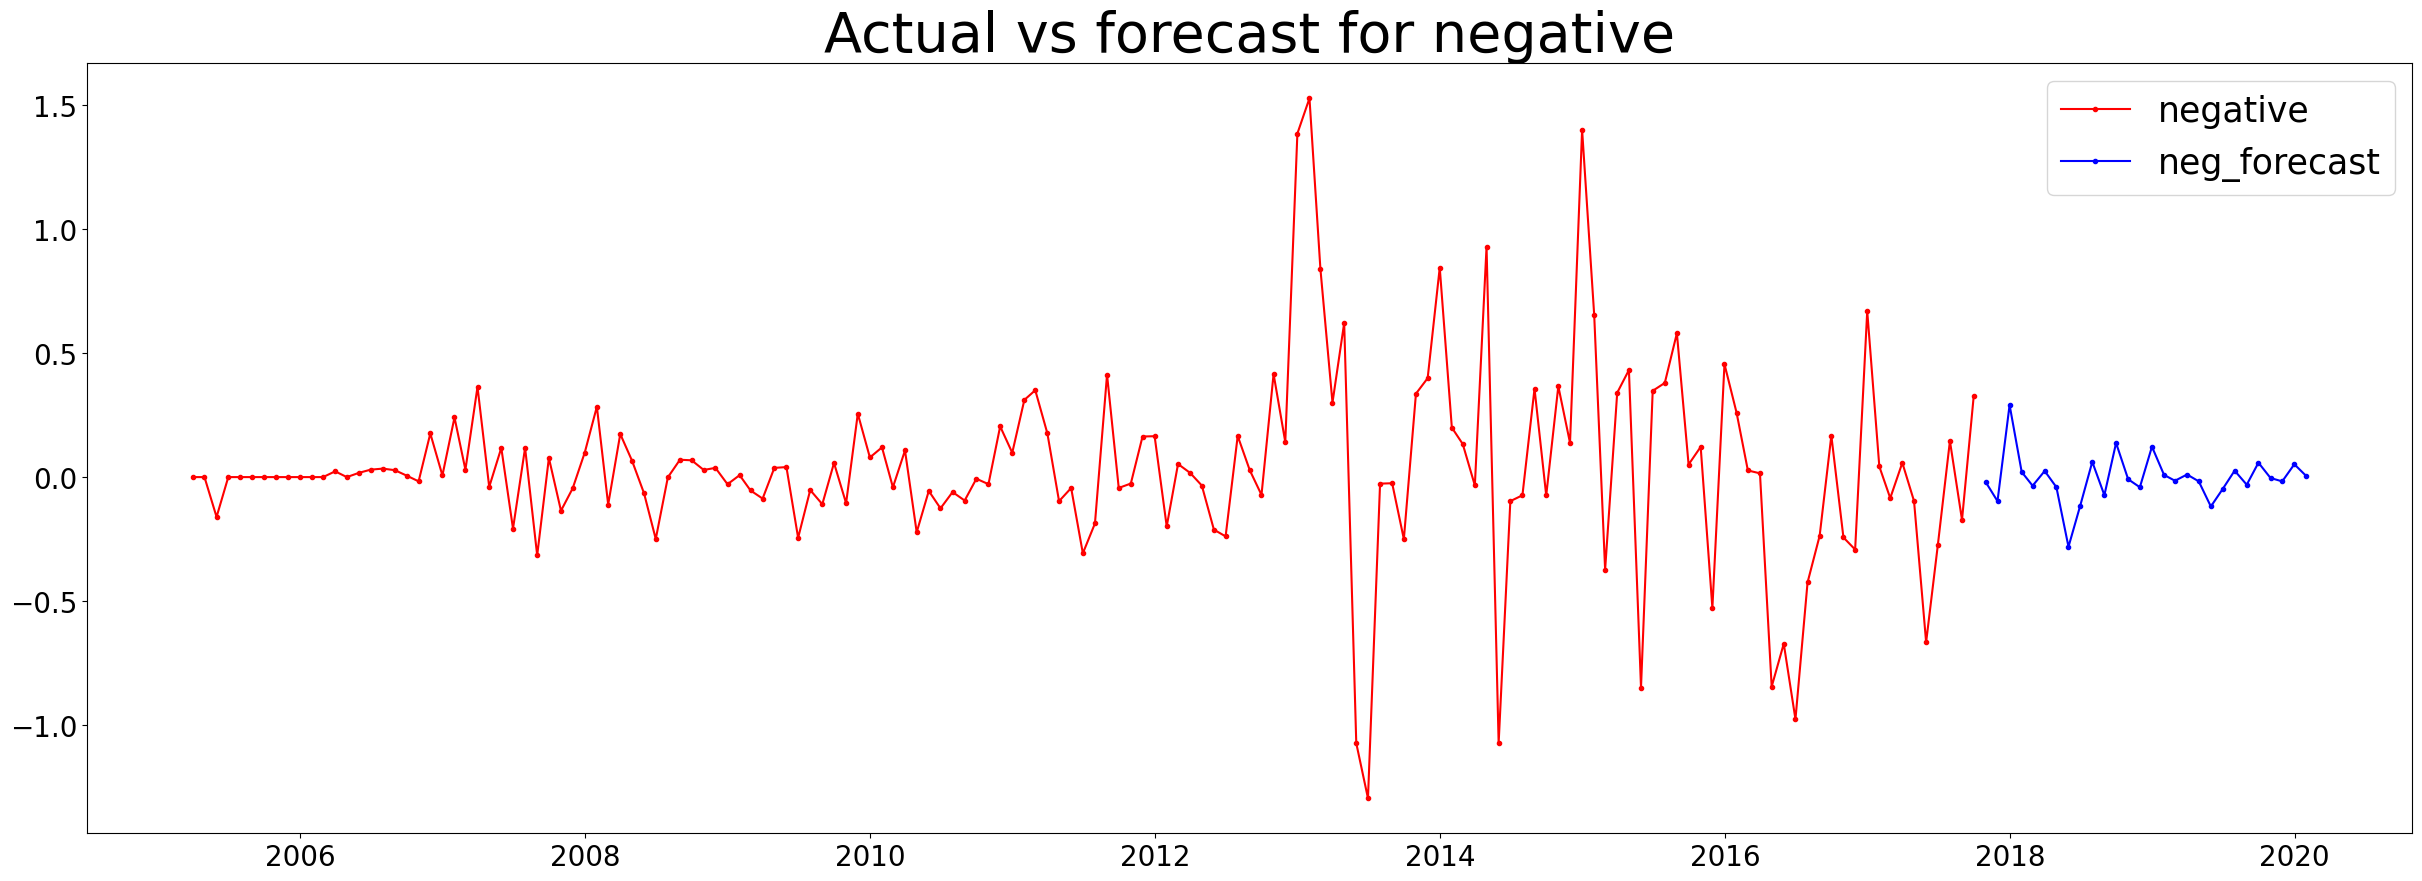

In [115]:
plt.figure(figsize=(30,10))
plt.title('Actual vs forecast for negative',fontsize=40)
plt.plot(train['neg'],marker = '.', label = 'negative', color = 'red')
plt.plot(train3,marker = '.', label = 'neg_forecast', color = 'b')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=25);

In [116]:
def is_delivery_related(review):
    keywords = ['delivery', 'shipping', 'shipment', 'courier', 'logistics', 'dispatch', 'transport', 'package', 'tracking', 'eta']
    for keyword in keywords:
        if keyword in review.lower():
            return 1
    return 0

In [117]:
df['delivery_related'] = df['reviewText'].apply(is_delivery_related)

In [118]:
df.delivery_related.value_counts()

0    191827
1      7449
Name: delivery_related, dtype: int64

In [119]:
new = df[df['delivery_related'] == 1][['reviewText','brand']]
new

reviewText  \
0       book beautiful photos good understandable dire...   
4       days ago received fabulous book organic wire m...   
15      always love way eva thinks fun designs book ea...   
40      great quick read getaway time traditional plot...   
72      new author story started pretty quickly totall...   
...                                                   ...   
199489  got orange sweatshirt shipping soft sweatshirt...   
199518  love inexpensive exactly wanted nonesense comf...   
199525  nice fits well looks great price good charge s...   
199529  price amazingly low shipping free sweatshirt g...   
199532  previous reviews mentioned shirt runs bit smal...   

                                        brand  
0          Visit Amazon's Eva M. Sherman Page  
4          Visit Amazon's Eva M. Sherman Page  
15         Visit Amazon's Eva M. Sherman Page  
40      Visit Amazon's Jeannette Winters Page  
72      Visit Amazon's Jeannette Winters Page  
...                                       ...  
199489                                Jerzees  
199518                                Jerzees  
199525                                Jerzees  
199529                                Jerzees  
199532                                Jerzees  

[7449 rows x 2 columns]

In [120]:
model2 = SARIMAX(train['pos'],order=(1, 0, 1),seasonal_order=(1,0,1,12)).fit()
pred1 = model2.predict()

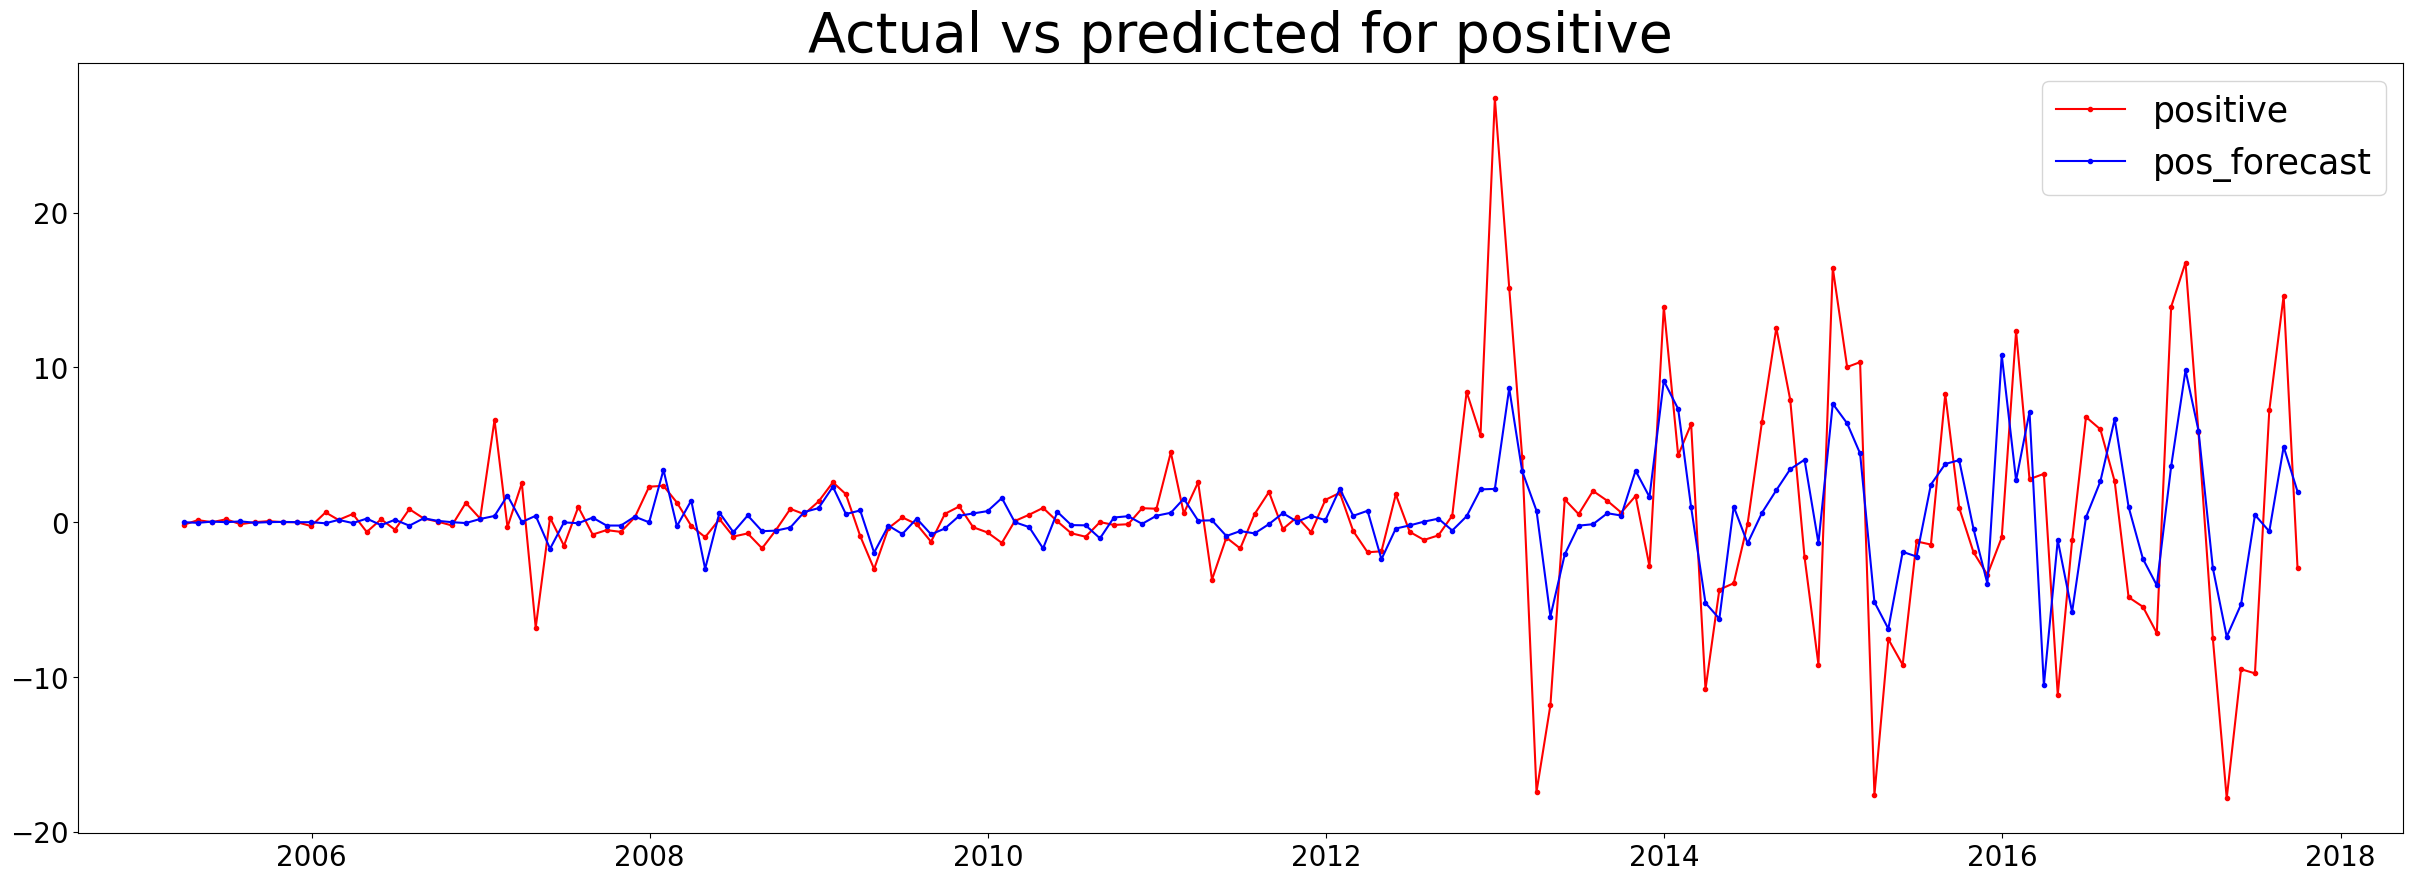

In [121]:
plt.figure(figsize=(30,10))
plt.title('Actual vs predicted for positive',fontsize=40)
plt.plot(train['pos'],marker = '.', label = 'positive', color = 'red')
plt.plot(pred1,marker = '.', label = 'pos_forecast', color = 'b')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=25);

## For brand : SPERRY

### Seasonal Decompose  For Positive Reviews

In [122]:
decomposition=seasonal_decompose(sp['pos'], period=12)
d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid

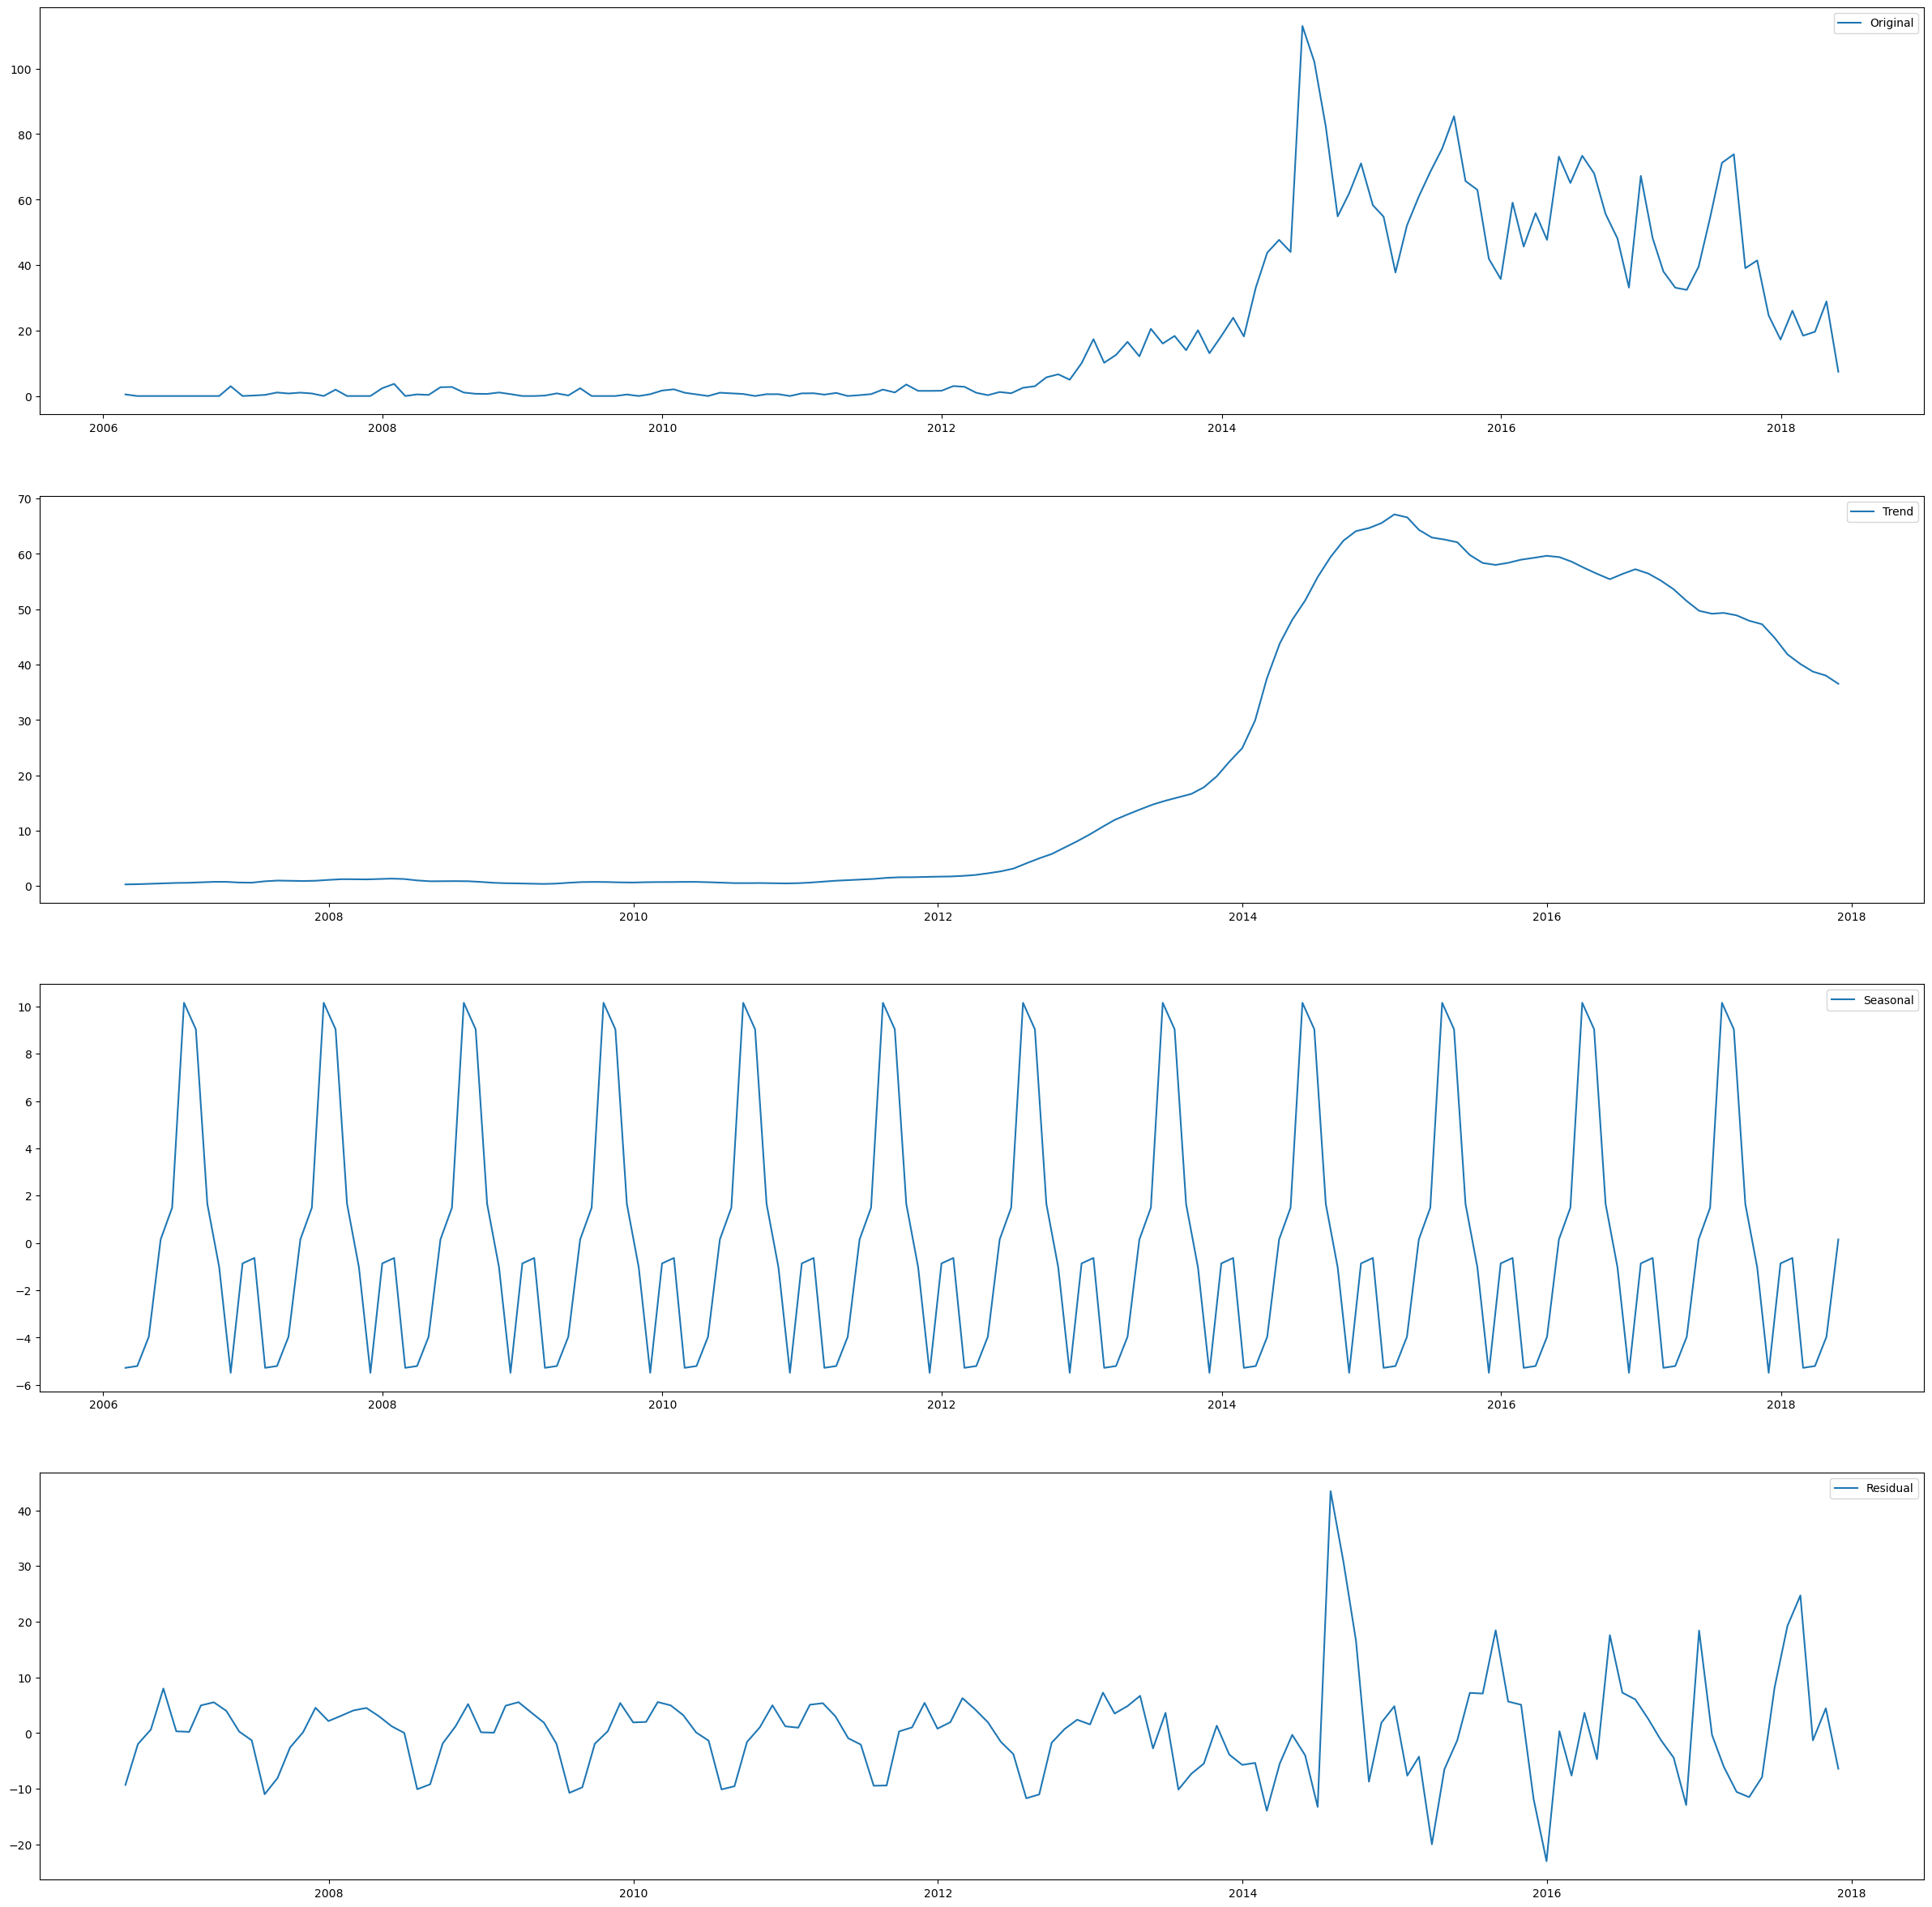

In [123]:
fig,ax = plt.subplots(4,2,figsize=(30,30))

plt.subplot(411)
plt.plot(sp['pos'],label='Original')
plt.legend()

plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend();

### Seasonal Decompose  For Neutral Reviews

In [124]:
decomposition=seasonal_decompose(sp['neu'], period=12)
d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid

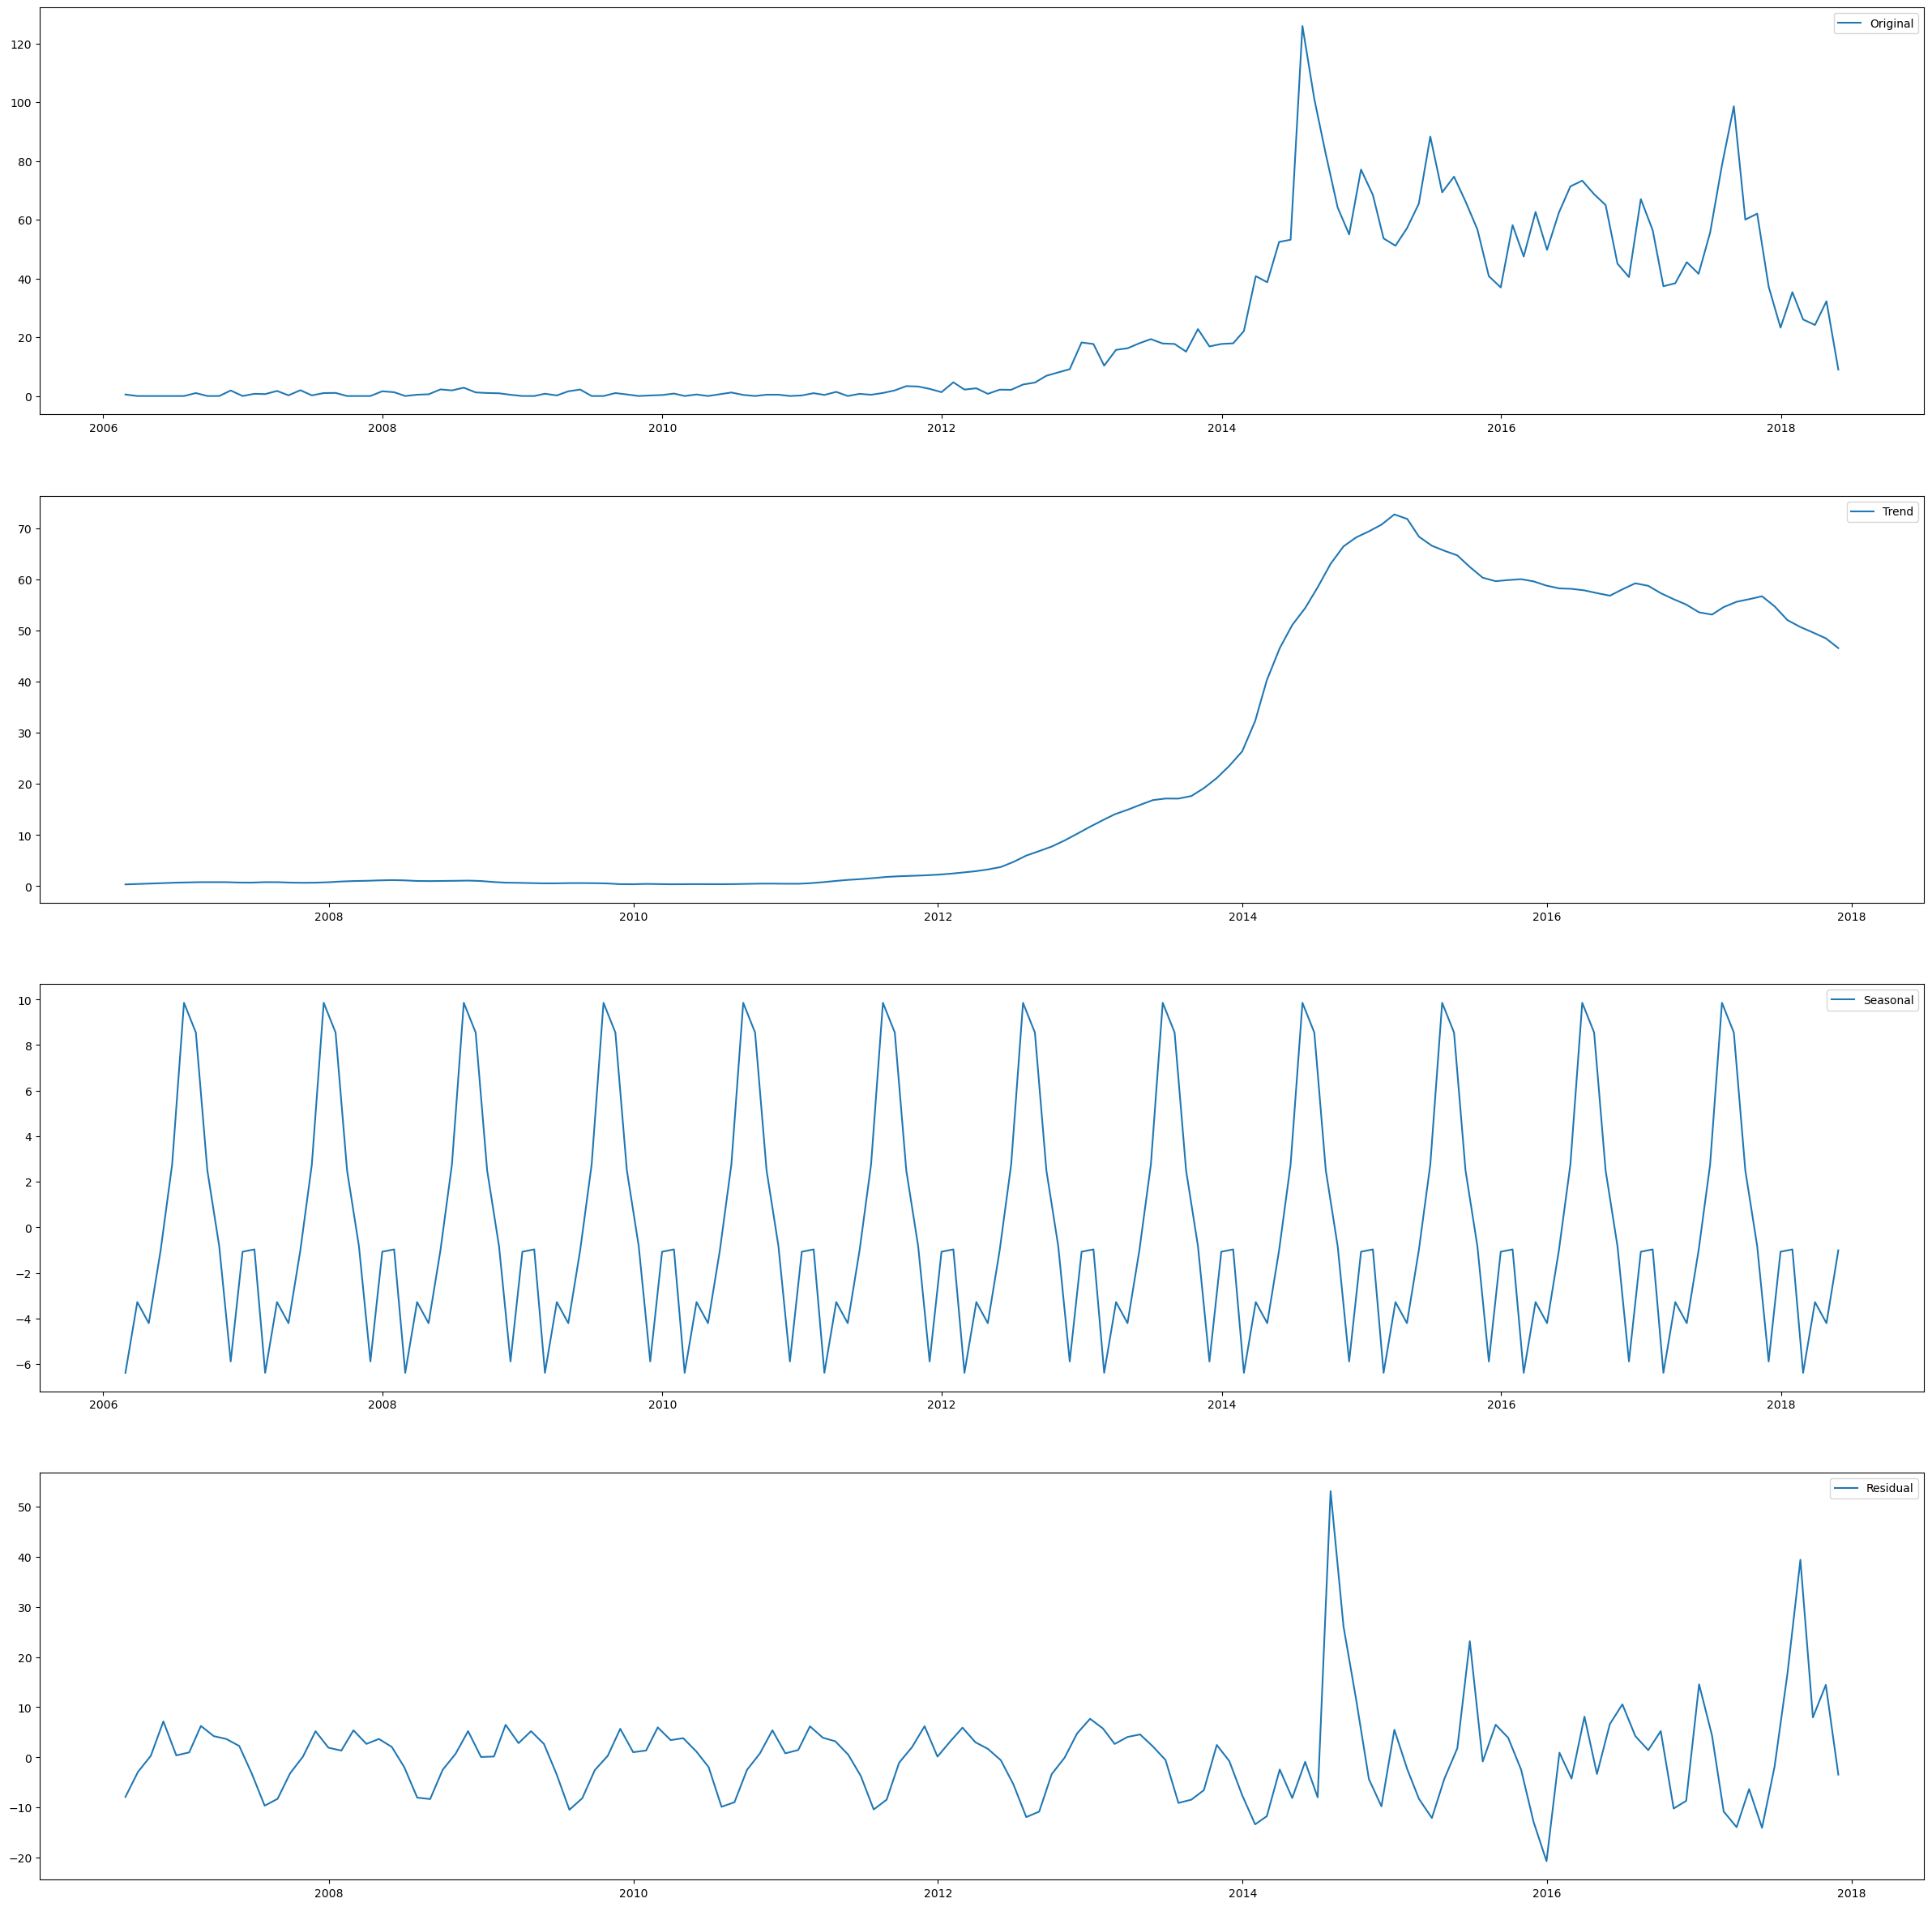

In [125]:
fig,ax = plt.subplots(4,2,figsize=(30,30))

plt.subplot(411)
plt.plot(sp['neu'],label='Original')
plt.legend()

plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend();

### Seasonal Decompose  For Negative Reviews

In [126]:
decomposition=seasonal_decompose(sp['neg'], period=12)
d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid

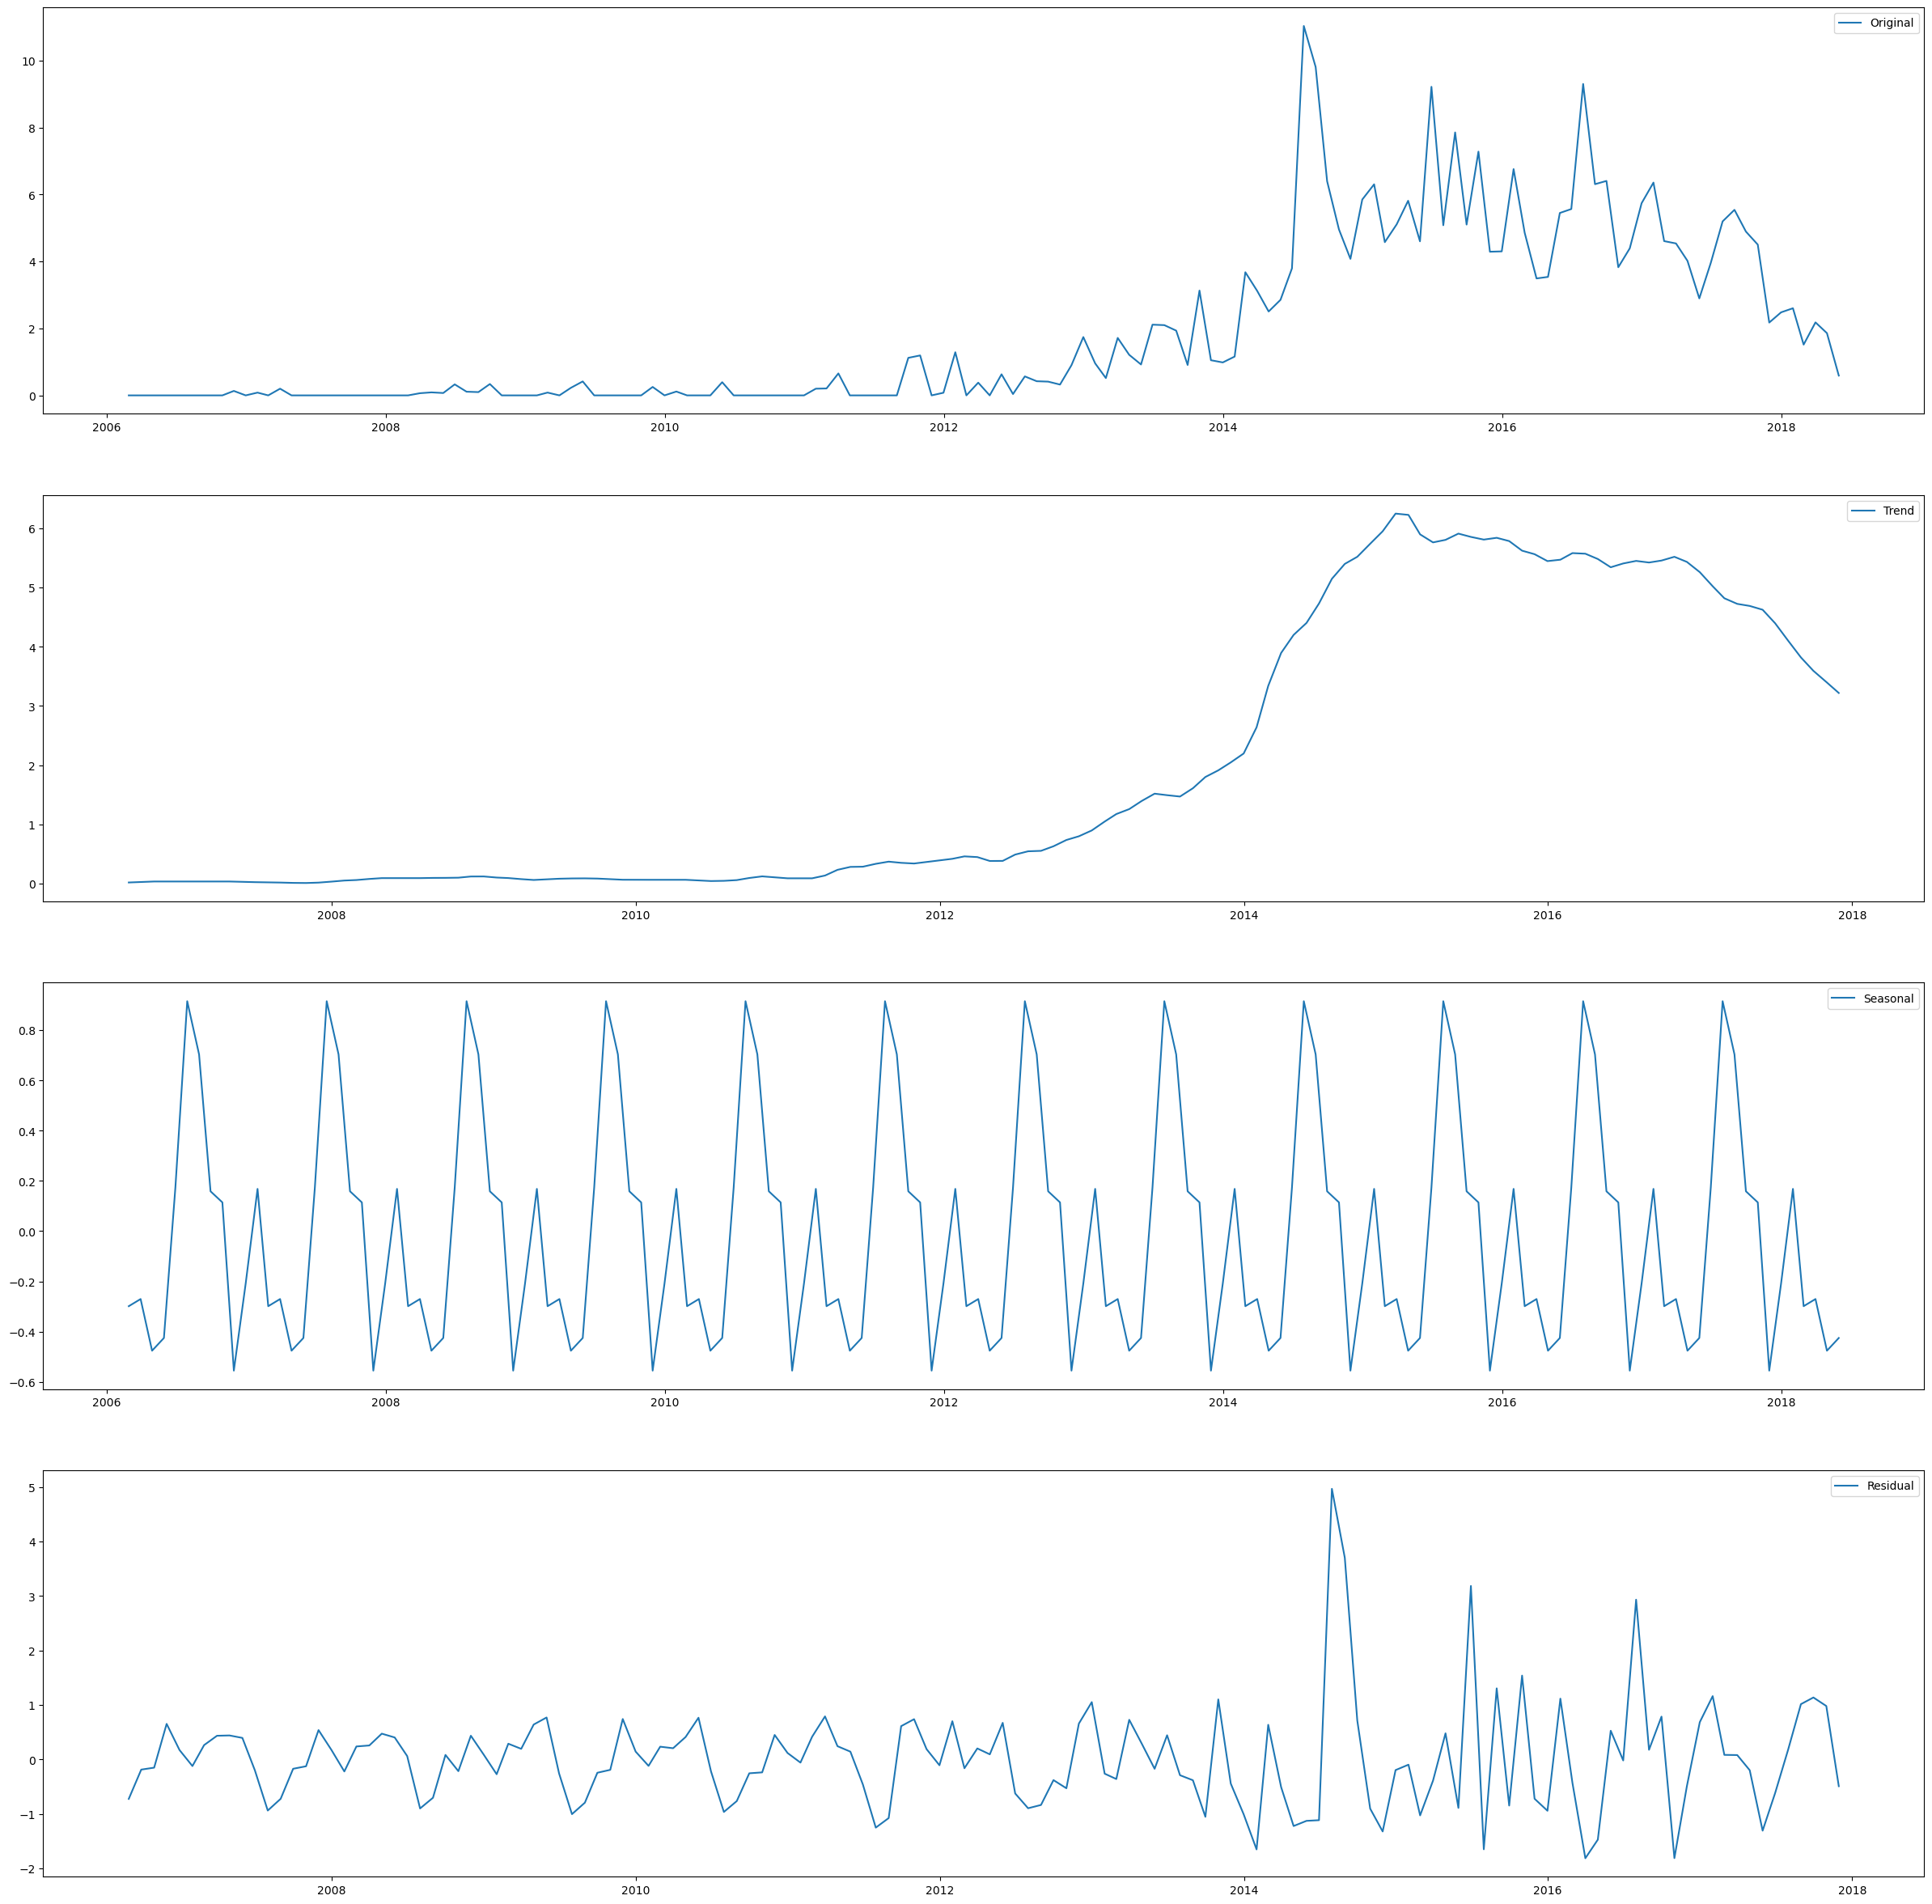

In [127]:
fig,ax = plt.subplots(4,2,figsize=(30,30))

plt.subplot(411)
plt.plot(sp['neg'],label='Original')
plt.legend()

plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend();

In [128]:
# Checking Stationarity of positive Sentiment Column
checkstationary(sp['pos'])

'Pvalue:0.1439737116183175.Data is not stationary, make data stationary'

In [129]:
# Checking Stationarity of neutral Sentiment Column
checkstationary(sp['neu'])

'Pvalue:0.15596755080478203.Data is not stationary, make data stationary'

In [130]:
# Checking Stationarity of Negative Sentiment Column
checkstationary(sp['neg'])

'Pvalue:0.5905133419666863.Data is not stationary, make data stationary'

### Calculate rolling mean and subtract it from the data

In [131]:
rolling_mean = sp['pos'].rolling(window=3).mean()
df_trend = sp['pos'] - rolling_mean
df_trend.dropna(inplace=True)

# Calculate seasonal component and subtract it from the data
df_seasonal = sp['pos'] - df_trend
df_seasonal.dropna(inplace=True)
# First order differencing
df_diff = df_seasonal.diff().dropna()

In [132]:
rolling_mean1 = sp['neu'].rolling(window=3).mean()
df_trend1 = sp['neu'] - rolling_mean1
df_trend1.dropna(inplace=True)

# Calculate seasonal component and subtract it from the data
df_seasonal1 = sp['neu'] - df_trend1
df_seasonal1.dropna(inplace=True)

# First order differencing
df_diff1 = df_seasonal1.diff().dropna()

In [133]:
rolling_mean2 = sp['neg'].rolling(window=2).mean()
df_trend2 = sp['neg'] - rolling_mean2
df_trend2.dropna(inplace=True)

# Calculate seasonal component and subtract it from the data
df_seasonal2 = sp['neg'] - df_trend2
df_seasonal2.dropna(inplace=True)

# First order differencing
df_diff2 = df_seasonal2.diff().dropna()

### check stationarity for positive column

In [134]:
checkstationary(df_diff)

'Pvalue:0.11490558132726164.Data is not stationary, make data stationary'

### check stationarity for neutral column

In [135]:
checkstationary(df_diff1)

'Pvalue:0.029222920921329904. Data is stationary, Proceed to model building'

### check stationarity for negative column

In [136]:
checkstationary(df_diff2)

'Pvalue:5.774855982476239e-07. Data is stationary, Proceed to model building'

In [137]:
df_time_sp = pd.concat([df_diff, df_diff1, df_diff2], axis=1, keys=['pos','neu','neg'])
df_time_sp.head()

pos       neu  neg
reviewTime                      
2006-04-30    NaN       NaN  0.0
2006-05-31 -0.161 -0.172333  0.0
2006-06-30  0.000  0.000000  0.0
2006-07-31  0.000  0.000000  0.0
2006-08-31  0.000  0.333333  0.0

In [138]:
df_time_sp.dropna(inplace=True)

In [139]:
df_time_sp.isnull().sum()

pos    0
neu    0
neg    0
dtype: int64

###  ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) For positive

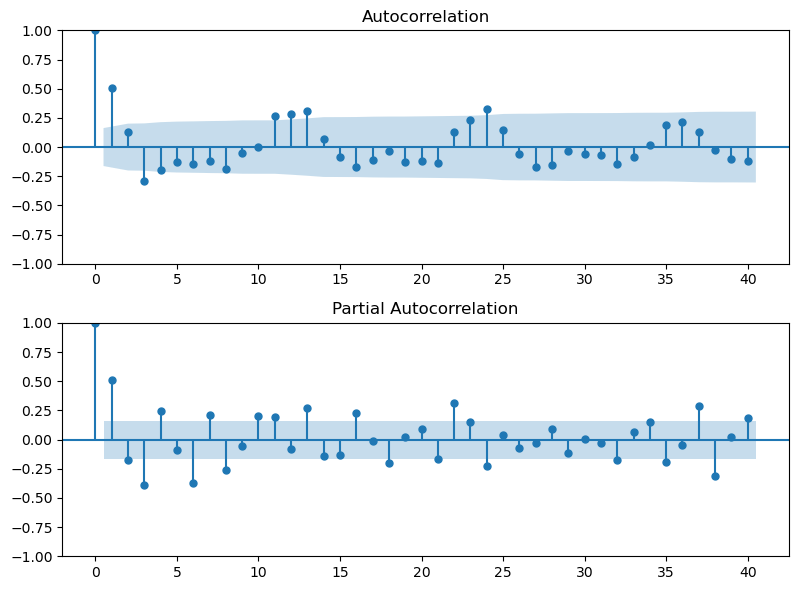

In [140]:
fig = plt.figure(figsize=(8, 6))

# Show ACF
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(df_time_sp['pos'], lags=40, ax=ax1)

# Show PACF
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(df_time_sp['pos'], lags=40, ax=ax2)

plt.tight_layout()

###  ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) For neutral

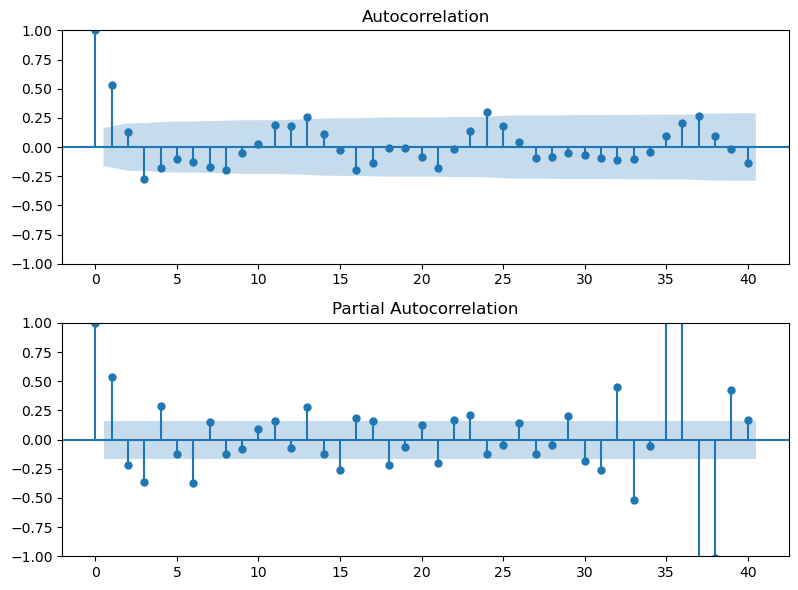

In [141]:
fig = plt.figure(figsize=(8, 6))

# Show ACF
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(df_time_sp['neu'], lags=40, ax=ax1)

# Show PACF
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(df_time_sp['neu'], lags=40, ax=ax2)

plt.tight_layout()

###  ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) For negative

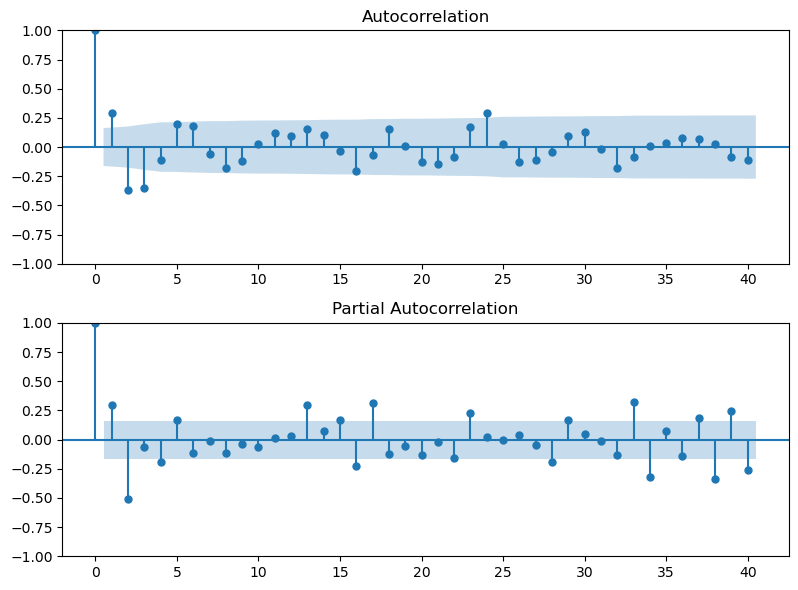

In [142]:
fig = plt.figure(figsize=(8, 6))

# Show ACF
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(df_time_sp['neg'], lags=40, ax=ax1)

# Show PACF
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(df_time_sp['neg'], lags=40, ax=ax2)

plt.tight_layout()

### Creating function to get optimum p and q value

### For positive column

In [143]:
import pmdarima as pm

# fit ARIMA model using auto_arima
model = pm.auto_arima(df_time_sp['pos'], start_p=1, start_q=1, max_p=5, max_q=5,
                      seasonal=False, trace=True, error_action='ignore', 
                      suppress_warnings=True, stepwise=True)

# print summary
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=853.493, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=894.722, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=853.238, Time=0.16 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=862.266, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=850.675, Time=0.10 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=830.025, Time=0.14 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=823.535, Time=0.23 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=824.518, Time=0.27 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=825.281, Time=0.26 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=826.415, Time=0.22 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=815.566, Time=0.38 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=inf, Time=0.87 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=inf, Time=0.88 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=817.549, Time=0.63 sec

Best model:  ARIMA(5,0,1)(0,0,0)[0]          
Total fi

### For neutral column

In [144]:
# fit ARIMA model using auto_arima
model1 = pm.auto_arima(df_time_sp['neu'], start_p=1, start_q=1, max_p=5, max_q=5,
                      seasonal=False, trace=True, error_action='ignore', 
                      suppress_warnings=True, stepwise=True)

# print summary
print(model1.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=864.146, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=910.625, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=864.886, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=874.077, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=854.377, Time=0.19 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=860.032, Time=0.19 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=837.288, Time=0.15 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=842.913, Time=0.08 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=834.213, Time=0.20 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=832.700, Time=0.13 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=832.979, Time=0.13 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=828.427, Time=0.50 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=inf, Time=0.89 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=inf, Time=0.65 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=830.084, Time

### For negative column

In [145]:
# fit ARIMA model using auto_arima
model1 = pm.auto_arima(df_time_sp['neg'], start_p=1, start_q=1, max_p=5, max_q=5,
                      seasonal=False, trace=True, error_action='ignore', 
                      suppress_warnings=True, stepwise=True)

# print summary
print(model1.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.32 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=330.410, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=319.282, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=290.881, Time=0.07 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.33 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.37 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=292.878, Time=0.11 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 1.321 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  145
Model:               SARIMAX(0, 0, 1)   Log Likelihood                -143.440
Date:                Thu, 13 Apr 2023   AIC                            290.881
Time:                        12:20:29   BIC                            296.834
Sample:                    05-31-2006   HQ

### Splitting the data

In [146]:
split = int(0.95 * len(df_time_sp))
train = df_time_sp.iloc[:split]
test = df_time_sp.iloc[split:]
print("Train = {}, Test = {}".format(len(train), len(test)))

Train = 137, Test = 8


### Model building

### Creating function for sarima model for positive sentiment

In [147]:
def SARMA1(df):
    model2 = SARIMAX(train['pos'],order=(5, 0, 1),seasonal_order=(5,0,1,12)).fit()
    print('Summary : S')
    print('past_predictions : past')
    print('future_predictions : future')
    select = input('Enter you requried information: ')
    summary  = model2.summary()
    pred1 = model2.predict()
    forecast1 = model2.forecast(len(test['pos'])+20)
    if select == 'S':
        return summary
    elif select == 'past':
        return pred1
    else:
        return forecast1### Creating function for sarima model for neutral sentiment

### Creating function for sarima model for neutral sentiment

In [148]:
def SARMA2(df):
    model2 = SARIMAX(train['neu'],order=(5, 0, 1),seasonal_order=(5,0,1,12)).fit()
    print('Summary : S')
    print('past_predictions : past')
    print('future_predictions : future')
    select = input('Enter you requried information: ')
    summary  = model2.summary()
    pred1 = model2.predict()
    forecast1 = model2.forecast(len(test['neu'])+20)
    if select == 'S':
        return summary
    elif select == 'past':
        return pred1
    else:
        return forecast1

### Creating function for sarima model for negative sentiment

In [149]:
def SARMA3(df):
    model2 = SARIMAX(train['neg'],order=(0, 0, 1),seasonal_order=(0,0,1,12)).fit()
    print('Summary : S')
    print('past_predictions : past')
    print('future_predictions : future')
    select = input('Enter you requried information: ')
    summary  = model2.summary()
    pred1 = model2.predict()
    forecast1 = model2.forecast(len(test['neg'])+20)
    if select == 'S':
        return summary
    elif select == 'past':
        return pred1
    else:
        return forecast1

In [150]:
train1 = SARMA1(train['pos'])

Summary : S
past_predictions : past
future_predictions : future
Enter you requried information: df


In [151]:
train2 = SARMA2(train['neu'])

Summary : S
past_predictions : past
future_predictions : future
Enter you requried information: df


In [152]:
train3 = SARMA3(train['neg'])

Summary : S
past_predictions : past
future_predictions : future
Enter you requried information: df


## Plot graph Actual vs forecast for positive

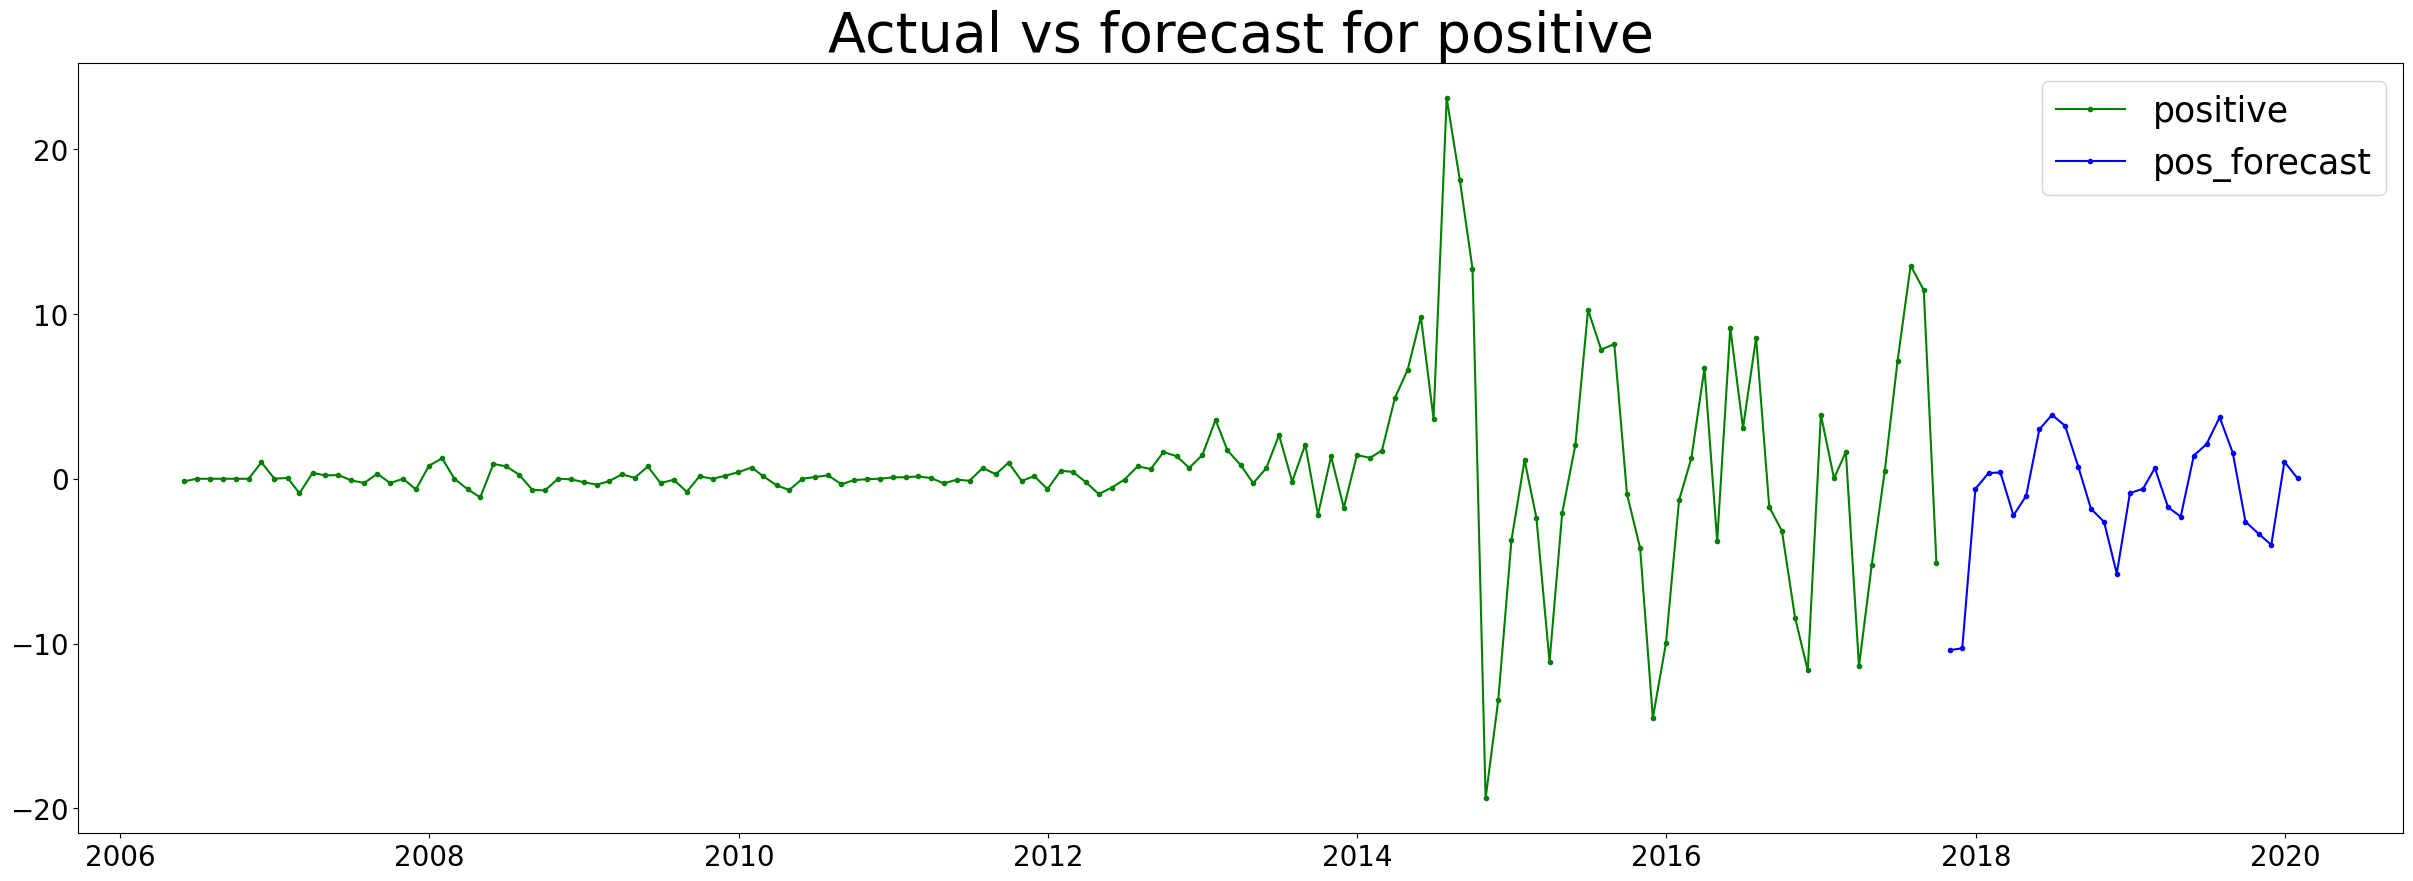

In [153]:
plt.figure(figsize=(30,10))
plt.title('Actual vs forecast for positive',fontsize=40)
plt.plot(train['pos'],marker = '.', label = 'positive', color = 'g')
plt.plot(train1,marker = '.', label = 'pos_forecast', color = 'b')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=25);

## Plot graph Actual vs forecast for neutral

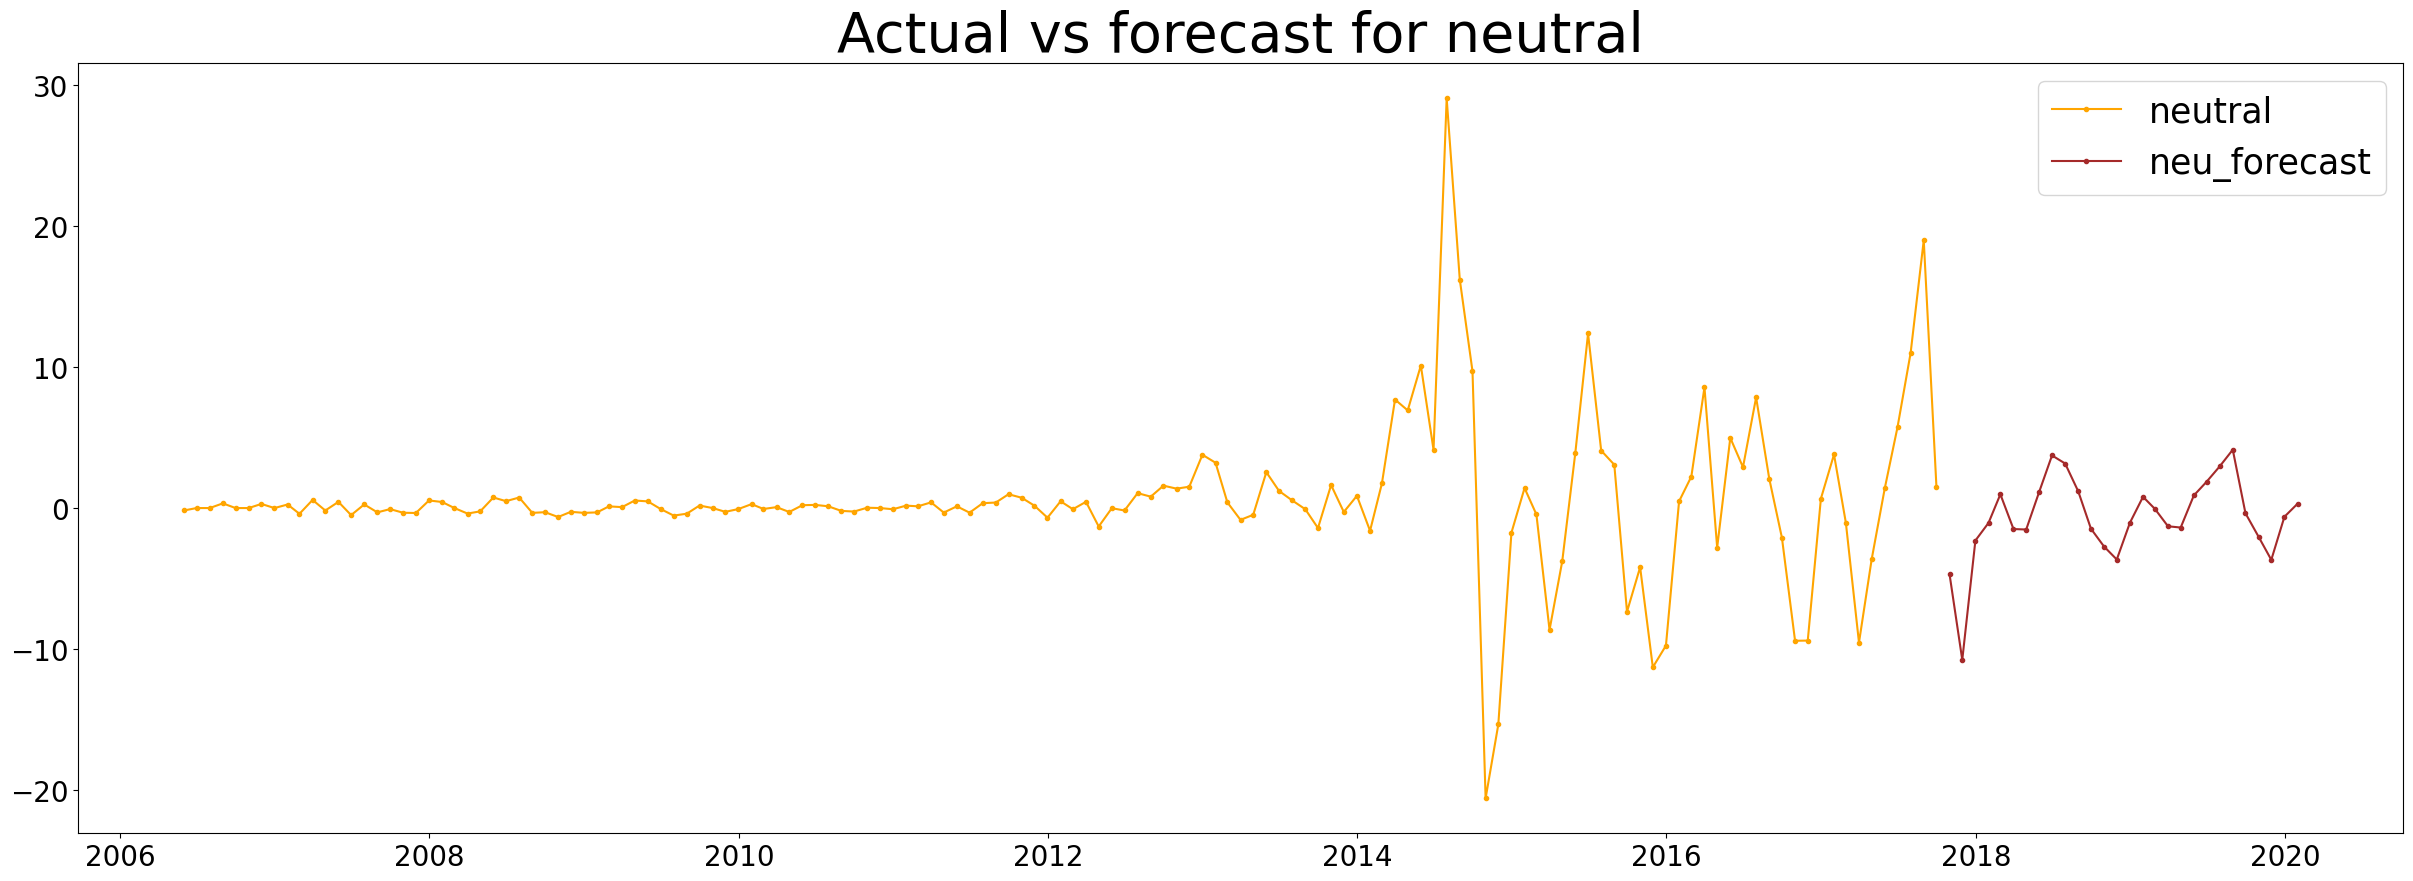

In [154]:
plt.figure(figsize=(30,10))
plt.title('Actual vs forecast for neutral',fontsize=40)
plt.plot(train['neu'],marker = '.', label = 'neutral', color = 'orange')
plt.plot(train2,marker = '.', label = 'neu_forecast', color = 'brown')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=25);

## Plot graph Actual vs forecast for negative

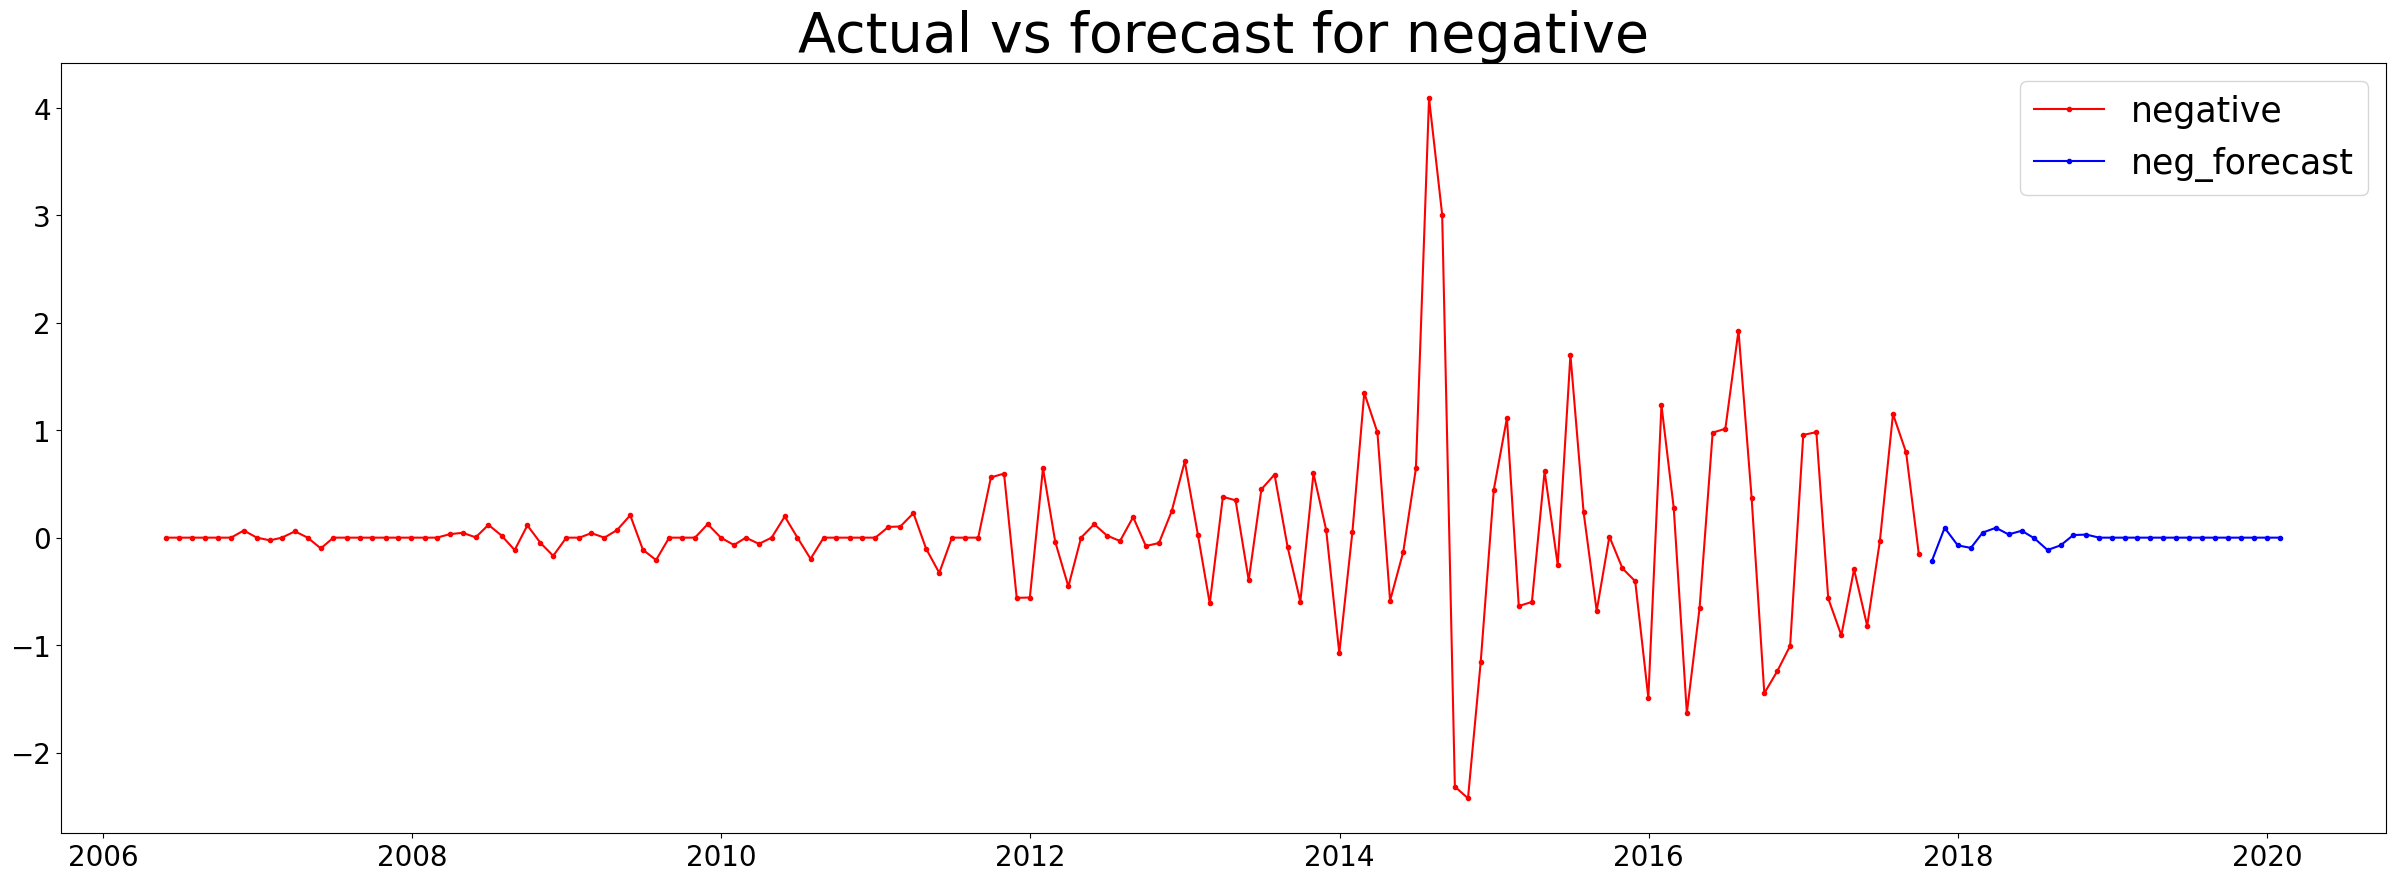

In [156]:
plt.figure(figsize=(30,10))
plt.title('Actual vs forecast for negative',fontsize=40)
plt.plot(train['neg'],marker = '.', label = 'negative', color = 'red')
plt.plot(train3,marker = '.', label = 'neg_forecast', color = 'b')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=25);